In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.transforms as transforms
# import matplotlib
from matplotlib import gridspec
from scipy import cluster
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, fclusterdata, leaves_list, cophenet
from scipy.spatial.distance import pdist
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (7, 5)
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


colors: http://colorbrewer2.org/#type=sequential&scheme=Greys&n=8

# sns datasets

In [135]:
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

# scatter plot

#### ax.scatter, use c>color, s>marker size, marker>marker type, or use '-o' to specify color and marker at the same time

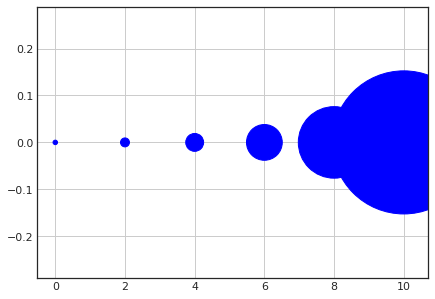

In [199]:
x = [0,2,4,6,8,10]
y = [0]*len(x)
s = [20*4**n for n in range(len(x))]
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111)
    ax.scatter(x, y, s=s, c='blue', marker='o')
    plt.show()
    plt.close()

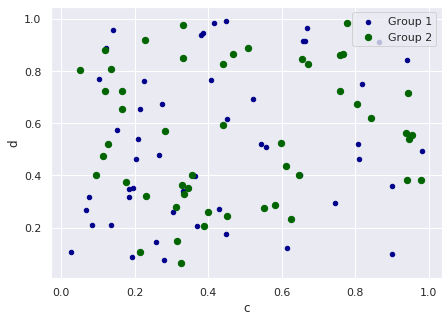

In [203]:
# make scatter plot
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
# scatter plot, color dots by groups
ax = df.plot(kind='scatter', x='a', y='b', s=20, c='DarkBlue', label='Group 1');
df.plot(kind='scatter', x='c', y='d', s=40, color='DarkGreen', label='Group 2', ax=ax);

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0


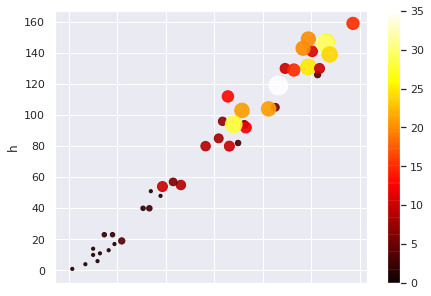

(0, 700)

(0, 200)

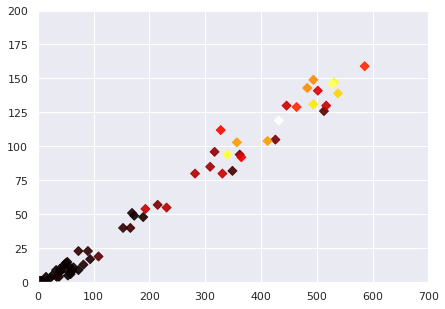

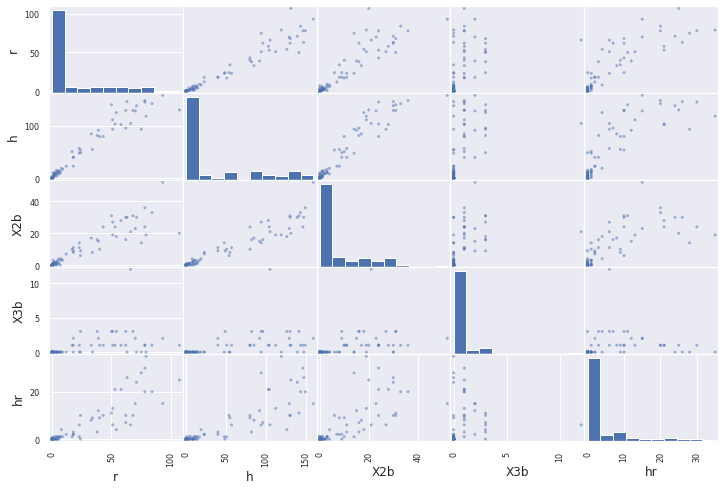

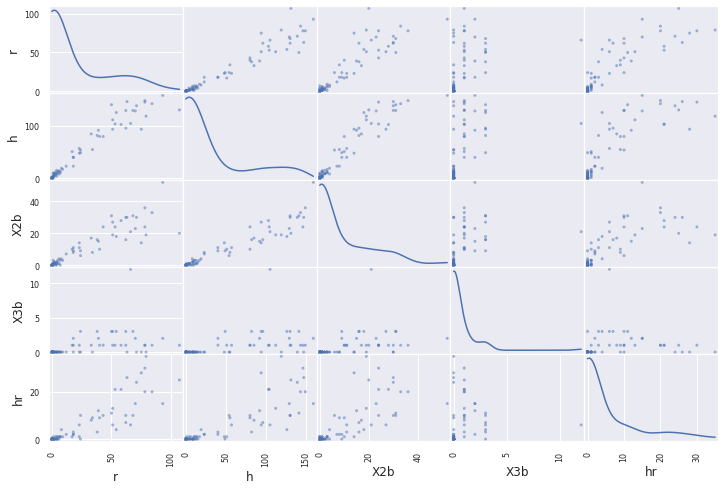

In [206]:
# more scatter plots
f = '/projects/trans_scratch/validations/workspace/szong/development/ds/baseball.csv'

df = pd.read_csv(f)
df.head(2)


# use df.plot, specify x, y with column names, not df.column_name
# s: marker size, c marker color, marker: marker type
df.plot(kind='scatter', x='ab', y='h',s=df.hr*10, c=df.hr, cmap='hot', marker='o', alpha=0.9) 
plt.show()

# use plt.scatter, pass in the x and y
plt.scatter(df.ab, df.h, c=df.hr, s=40, cmap='hot', marker='D', alpha=.9)
plt.xlim(0, 700); plt.ylim(0, 200);
plt.show()

_ = pd.plotting.scatter_matrix(df.loc[:,'r':'hr'], figsize=(12,8))
_ = pd.plotting.scatter_matrix(df.loc[:,'r':'hr'], figsize=(12,8), diagonal='kde')

good examples here for sns plotting
http://seaborn.pydata.org/tutorial/categorical.html?highlight=panel%20data

In [201]:
df.head()

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


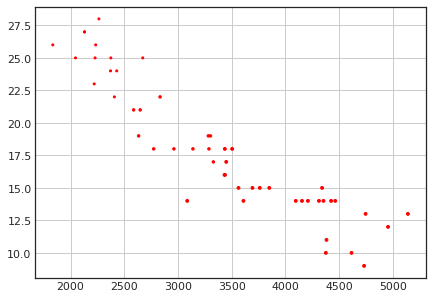

In [189]:
f = '/projects/trans_scratch/validations/workspace/szong/development/ds/test.csv'
# http://people.duke.edu/~ccc14/cfar-data-2016/Getting_Started_With_Graphics.html
# url = 'http://bit.ly/2b72LNj'
# df = pd.read_csv(url)

df = sns.load_dataset('mpg').head(50)
# scatter plot
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    plt.scatter(x = 'weight', y = 'mpg', c='red', s= 'cylinders', data = df)
    pass

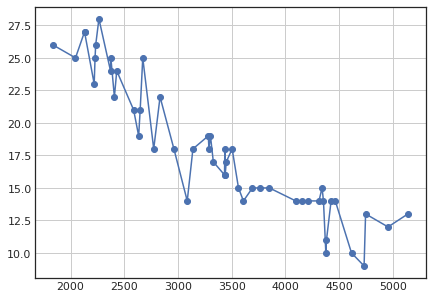

In [190]:
# line plot
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    plt.plot('weight', 'mpg', '-o', data = df.sort_values('weight'))
    pass

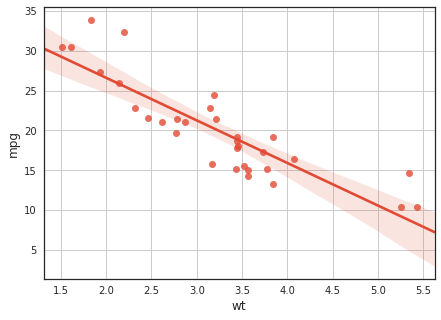

In [53]:
# Linear regression
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    sns.regplot('wt', 'mpg', data = df)
    pass

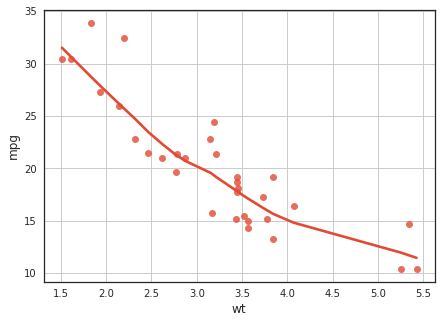

In [55]:
# Non-parametric regression
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    sns.regplot('wt', 'mpg', data = df, lowess = True,)
    pass

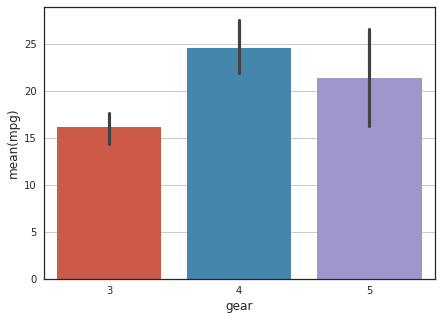

In [56]:
# Swarm plot
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    sns.barplot('gear', 'mpg', data = df)
    pass

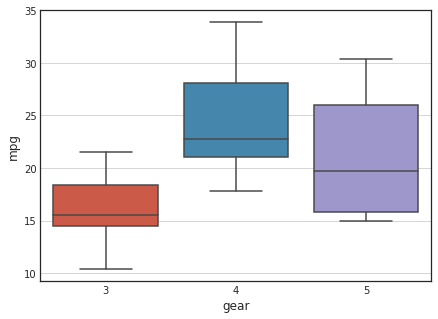

In [102]:
# boxplot
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    sns_plot = sns.boxplot('gear', 'mpg', data = df)
   
    pass

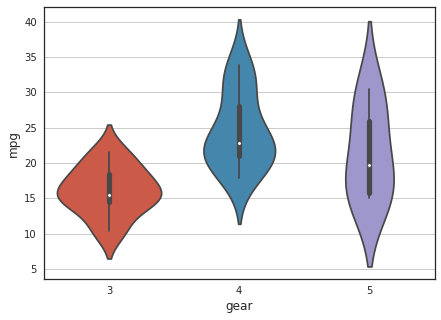

In [59]:
# violin plot
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    sns.violinplot('gear', 'mpg', data = df)
    pass

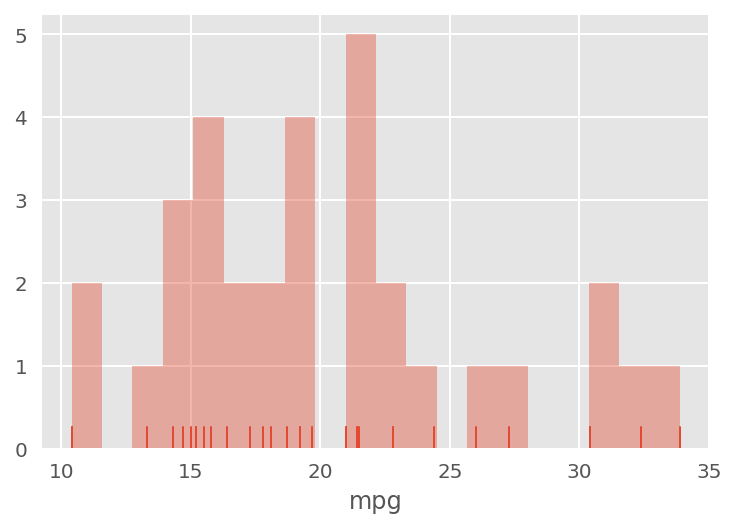

In [39]:
# histogram
sns.distplot(df.mpg, kde=False, rug=True, bins=20)
pass

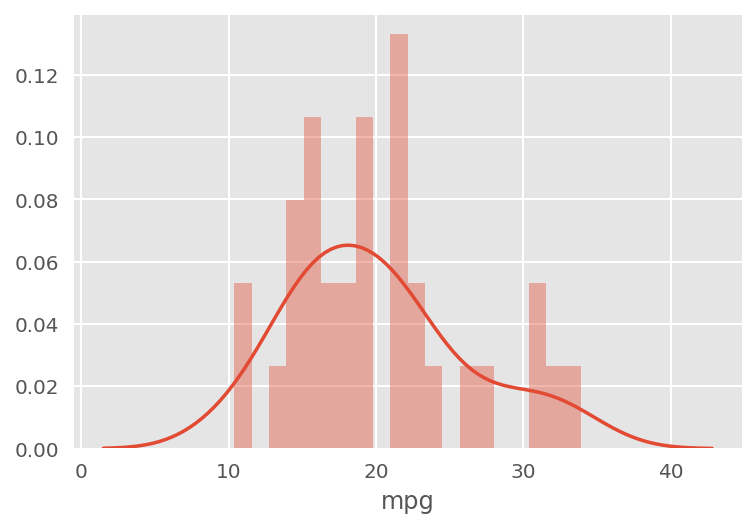

In [40]:
# density plot
sns.distplot(df.mpg, bins=20)
pass

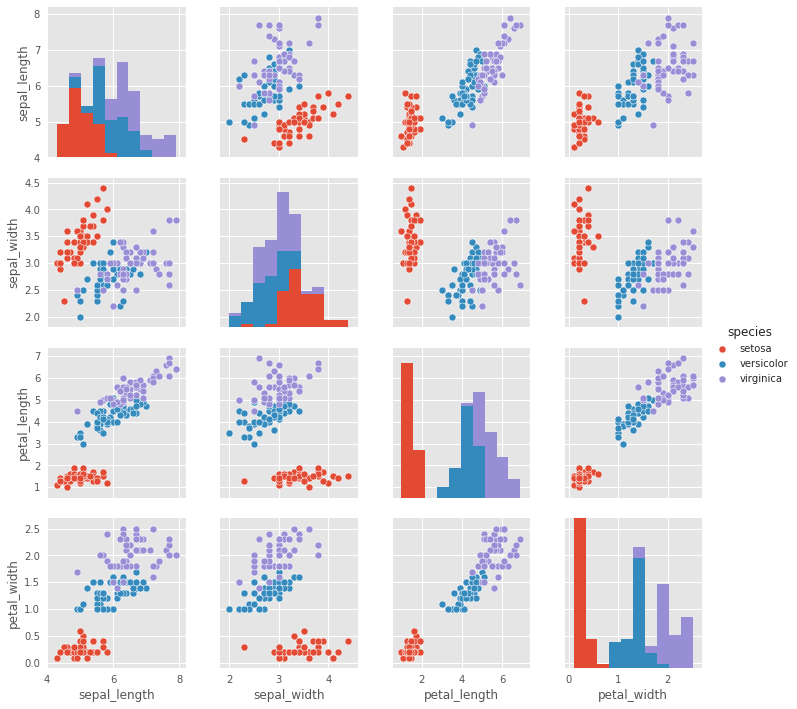

In [64]:
df = sns.load_dataset('iris')
sns_plot = sns.pairplot(df, hue='species', size=2.5)
sns_plot.savefig("output.png")

# Heatmap

In [103]:
exercise = sns.load_dataset("exercise", index_col = 0)

exercise.head()
df = exercise[exercise.kind == 'running']
df.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


,id,diet,pulse,time,kind
60,21,low fat,93,1 min,running
61,21,low fat,98,15 min,running
62,21,low fat,110,30 min,running
63,22,low fat,98,1 min,running
64,22,low fat,104,15 min,running


[None]

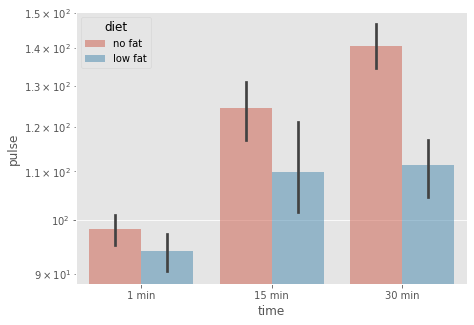

In [104]:
sns.barplot(x = 'time', y = 'pulse', hue = 'diet', data = df, alpha = 0.5);
plt.gca().set(yscale = "log") #change y to log scale
pass


Text(0.5, 1.0, 'Running')

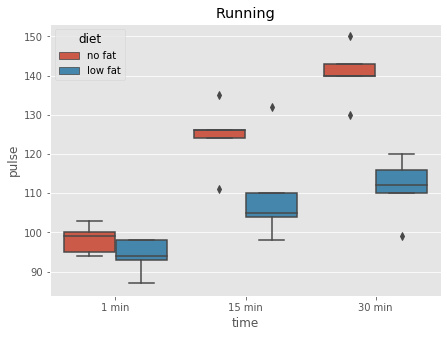

In [105]:
sns.boxplot(x = 'time', y = 'pulse', hue = 'diet', data = df)
plt.title('Running')
pass
plt.show()

In [28]:
# exercise

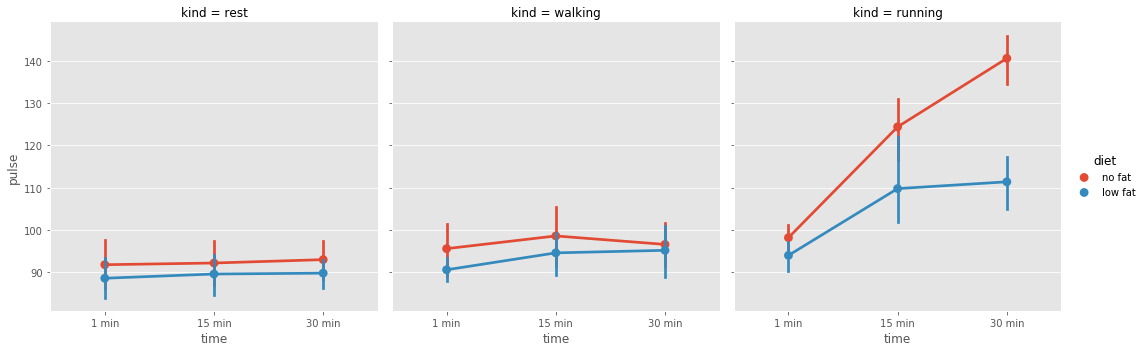

In [106]:
# sns.set_context("paper", font_scale=2.0)
# sns.set_style('white')
g = sns.factorplot(x = 'time', y = 'pulse', hue = 'diet', col = 'kind',
               kind = 'point', data = exercise)
sns.set()
sns.set_context("notebook", font_scale = 1.5)
g.savefig('exercise1.png')
pass

In [27]:
# practice labelencoder
lbe = LabelEncoder()
df.diet.value_counts()
lbe.fit(df.diet)
df['new'] = lbe.transform(df['diet'])
lbe.inverse_transform(1)

In [76]:
df.head(2)

,id,diet,pulse,time,kind,new
60,21,low fat,93,1 min,running,0
61,21,low fat,98,15 min,running,0


In [80]:
df['aaa'] = df.diet.apply(lambda x: 'bbbb' if x == 'no fat' else 'cccc')

In [81]:
df.head()
df.tail()

,id,diet,pulse,time,kind,new,aaa
60,21,low fat,93,1 min,running,0,cccc
61,21,low fat,98,15 min,running,0,cccc
62,21,low fat,110,30 min,running,0,cccc
63,22,low fat,98,1 min,running,0,cccc
64,22,low fat,104,15 min,running,0,cccc


,id,diet,pulse,time,kind,new,aaa
85,29,no fat,135,15 min,running,1,bbbb
86,29,no fat,130,30 min,running,1,bbbb
87,30,no fat,99,1 min,running,1,bbbb
88,30,no fat,111,15 min,running,1,bbbb
89,30,no fat,150,30 min,running,1,bbbb


[Text(0, 0.5, '')]

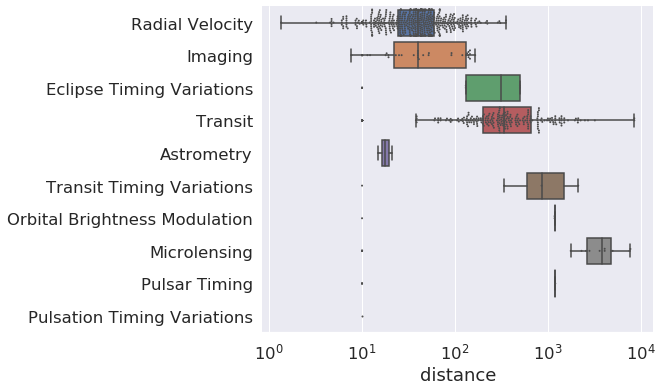

In [113]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=np.inf)#, palette="Set2")

# # Add in points to show each observation
sns.swarmplot(x="distance", y="method", data=planets,
              size=2, color=".3", linewidth=0)

# Make the quantitative axis logarithmic
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=False, left=True)
plt.show()

In [123]:
tips.head(2).values

array([[16.99, 1.01, 'Female', 'No', 'Sun', 'Dinner', 2],
       [10.34, 1.66, 'Male', 'No', 'Sun', 'Dinner', 3]], dtype=object)

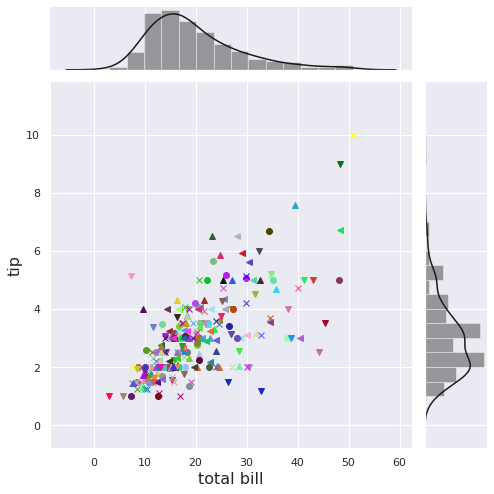

In [120]:
import seaborn as sns
from itertools import product
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
color = sns.color_palette()[5]
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg", stat_func=None,
                  xlim=(0, 60), ylim=(0, 12), color='k', size=7)

#Clear the axes containing the scatter plot
g.ax_joint.cla()

#Generate some colors and markers
colors = np.random.random((len(tips),3))
markers = ['x','o','v','^','<']*100

#Plot each individual point separately
for i,row in enumerate(tips.values):
    _ = g.ax_joint.plot(row[0], row[1], color=colors[i], marker=markers[i])

_ = g.set_axis_labels('total bill', 'tip', fontsize=16)

In [124]:
np.random.seed(sum(map(ord, "categorical")))

In [125]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

In [127]:
sns.stripplot??

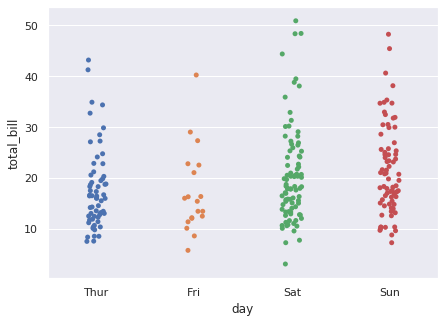

In [126]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

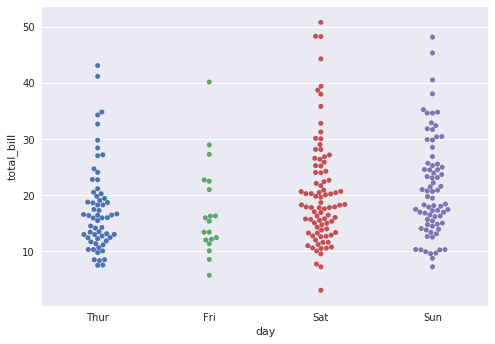

In [9]:
sns.swarmplot(x="day", y="total_bill", data=tips);

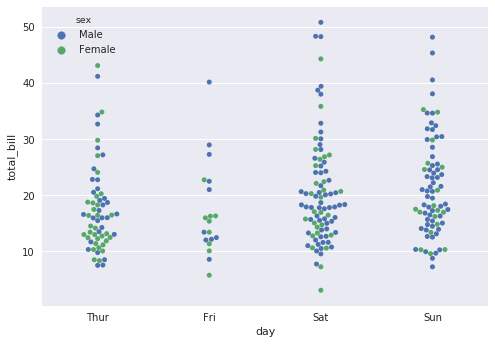

In [10]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

In [128]:
sns.pointplot??

Text(0, 0.5, 'number of spikes')

Text(0.5, 1.0, 'Median Number of Spikes')

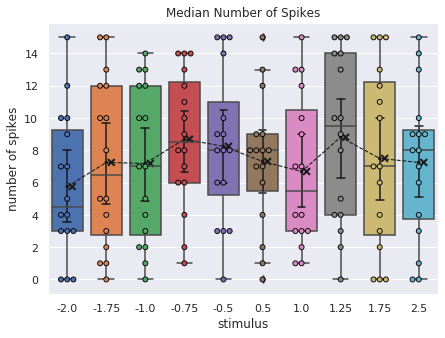

In [132]:
trial_vec    = np.tile(np.arange(16)+1, 10)     
stimulus_vec = np.repeat([-2., -1.75, -1., -0.75, -0.5,  0.5,  1.,  1.25,  1.75,  2.5 ], 16)
data_vec     = np.random.randint(0, 16, size=160)
spi_num      = pd.DataFrame({'trial': trial_vec, 
                             'stimulus': stimulus_vec, 'data': data_vec})

fig, ax = plt.subplots()

sns.pointplot(x="stimulus", y="data", data=spi_num, linestyles='', scale=1, 
              color='k', errwidth=1.5, capsize=0.2, markers='x', ax=ax)
#produce transform with 5 points offset in x direction
offset = transforms.ScaledTranslation(5/72., 0, ax.figure.dpi_scale_trans)
trans = ax.collections[0].get_transform()
ax.collections[0].set_transform(trans + offset)

sns.swarmplot(x="stimulus", y="data", data=spi_num, edgecolor="black", linewidth=.9, ax=ax)
sns.boxplot(x="stimulus", y="data", data=spi_num, saturation=1, ax=ax)
sns.pointplot(x="stimulus", y="data", data=spi_num, linestyles='--', scale=0.4, 
              color='k', errwidth=0, capsize=0, ax=ax)
plt.ylabel("number of spikes")
plt.title("Median Number of Spikes");

plt.show()

In [3]:
np.random.rand(15,4)

array([[ 0.67937865,  0.50864786,  0.9228593 ,  0.61918603],
       [ 0.81641942,  0.69597372,  0.2758997 ,  0.50927412],
       [ 0.25616611,  0.89649657,  0.98383404,  0.52419741],
       [ 0.80254718,  0.31728448,  0.17463652,  0.84928463],
       [ 0.26411322,  0.22867789,  0.35360272,  0.55401742],
       [ 0.90759723,  0.60527972,  0.26771109,  0.81043393],
       [ 0.53010497,  0.7681123 ,  0.24990917,  0.99995728],
       [ 0.53984179,  0.15717711,  0.22647503,  0.72497755],
       [ 0.45677743,  0.98589451,  0.08908638,  0.13557146],
       [ 0.74977359,  0.59731949,  0.83740367,  0.54675877],
       [ 0.90171097,  0.22176074,  0.6514115 ,  0.48856915],
       [ 0.77070014,  0.29249075,  0.8817407 ,  0.75869933],
       [ 0.74121615,  0.77975588,  0.24543525,  0.27547773],
       [ 0.34891336,  0.60299833,  0.38623597,  0.73233857],
       [ 0.62516032,  0.05565815,  0.06179568,  0.54196563]])

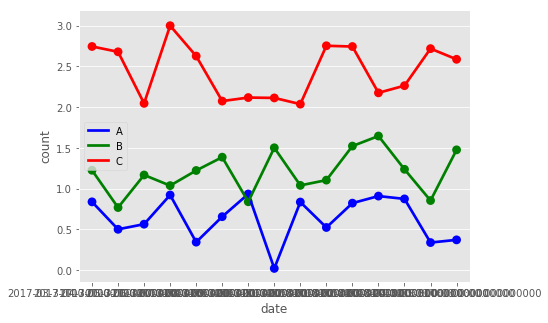

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

date = pd.date_range("2017-03", freq="M", periods=15)
count = np.random.rand(15,4)
df1 = pd.DataFrame({"date":date, "count" : count[:,0]})
df2 = pd.DataFrame({"date":date, "count" : count[:,1]+0.7})
df3 = pd.DataFrame({"date":date, "count" : count[:,2]+2})

f, ax = plt.subplots(1, 1)
x_col='date'
y_col = 'count'

sns.pointplot(ax=ax,x=x_col,y=y_col,data=df1,color='blue')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df2,color='green')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df3,color='red')

ax.legend(handles=ax.lines[::len(df1)+1], labels=["A","B","C"])
# print(ax.pointplot)

# ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
# plt.gcf().autofmt_xdate()

plt.show()

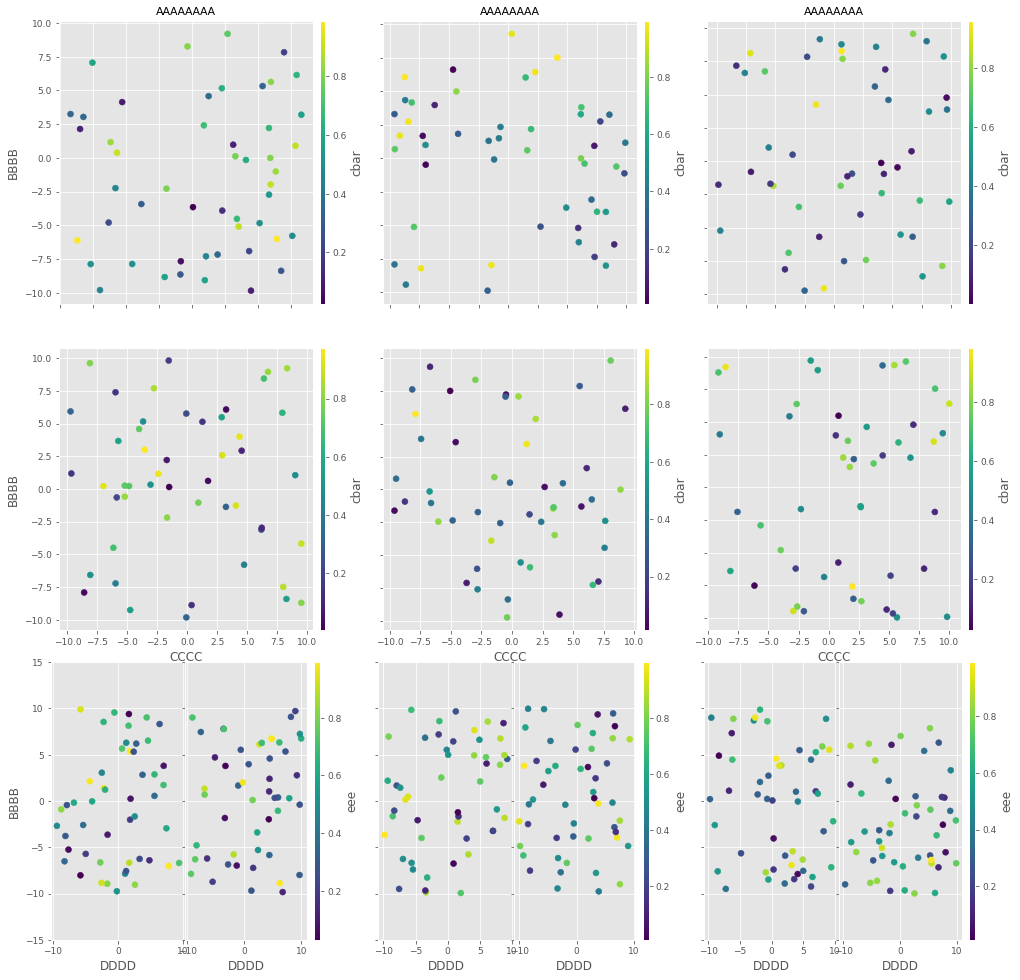

In [35]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np


def data():
    x = np.random.uniform(-10, 10., 50)
    y = np.random.uniform(-10, 10., 50)
    z = np.random.uniform(0, 1., 50)
    return x, y, z


def square_plot(gs, i):

    # Define gridspec ranges.
    x_gdsp = [[0, 2], [2, 4], [4, 6]]
    if i in [0, 1, 2]:
        y1, y2 = 0, 1
        x1, x2 = x_gdsp[i]
    elif i in [3, 4, 5]:
        y1, y2 = 1, 2
        x1, x2 = x_gdsp[i-3]

    ax = plt.subplot(gs[y1:y2, x1:x2])
    if i in [0, 1, 2]:
        plt.title('AAAAAAAA', fontsize=11)
        ax.set_xticklabels([])
    if i in [0, 3]:
        plt.ylabel('BBBB', fontsize=12)
    else:
        ax.set_yticklabels([])
    if i in [3, 4, 5]:
        plt.xlabel('CCCC', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=9)
    x, y, z = data()
    SC = plt.scatter(x, y, c=z)
    # Position colorbar.
    the_divider = make_axes_locatable(ax)
    color_axis = the_divider.append_axes("right", size="2%", pad=0.1)
    # Colorbar.
    cbar = plt.colorbar(SC, cax=color_axis)
    cbar.set_label('cbar', fontsize=12, labelpad=4, y=0.5)
    cbar.ax.tick_params(labelsize=9)
    ax.set_aspect(aspect='auto')


def rectangular_plots(gs, i):

    x_gdsp = [[[0, 1], [2, 3], [4, 5]], [[1, 2], [3, 4],  [5, 6]]]
    y1, y2 = 2, 3
    x11, x12 = x_gdsp[0][i]
    x21, x22 = x_gdsp[1][i]

    # Left plot.
    right_gs = gridspec.GridSpecFromSubplotSpec(
        1, 2, width_ratios=[1, 6], subplot_spec=gs[y1:y2, x11:x12],
        wspace=0.)
    ax3 = plt.subplot(right_gs[1])
    plt.ylim(-15., 15.)
    plt.xlabel('DDDD', fontsize=12)
    if i == 0:
        ax3.set_ylabel('BBBB', fontsize=12)
    else:
        ax3.set_yticklabels([])
    ax3.tick_params(axis='both', which='major', labelsize=9)
    x, y, z = data()
    plt.scatter(x, y, c=z)

    # Right pot.
    right_gs = gridspec.GridSpecFromSubplotSpec(
        1, 2, width_ratios=[6, 1], subplot_spec=gs[y1:y2, x21:x22],
        wspace=0.)
    ax4 = plt.subplot(right_gs[0])
    plt.ylim(-15., 15.)
    plt.xlabel('DDDD', fontsize=12)
    ax4.tick_params(axis='both', which='major', labelsize=9)
    ax4.set_yticklabels([])
    x, y, z = data()
    SC = plt.scatter(x, y, c=z)
    the_divider = make_axes_locatable(ax4)
    color_axis = the_divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(SC, cax=color_axis)
    cbar.set_label('eee', fontsize=12, labelpad=4, y=0.5)
    cbar.ax.tick_params(labelsize=9)


fig = plt.figure(figsize=(14.25, 13.5))

# Make square plots.
gs = gridspec.GridSpec(3, 6)
for i in range(6):
    square_plot(gs, i)

# New gridspecs for bottom rectangular plots.
# ***Values selected by hand***
gs2 = gridspec.GridSpec(3, 6)
gs2.update(wspace=0.0, bottom=0.029, left=0.031, right=0.95)
gs3 = gridspec.GridSpec(3, 6)
gs3.update(wspace=0.0, bottom=0.029, left=0.043, right=0.965)
gs4 = gridspec.GridSpec(3, 6)
gs4.update(wspace=0.0, bottom=0.029, left=0.05, right=0.976)

# Make plots.
rectangular_plots(gs2, 0)
rectangular_plots(gs3, 1)
rectangular_plots(gs4, 2)

fig.tight_layout()
plt.savefig('del.png', dpi=150)

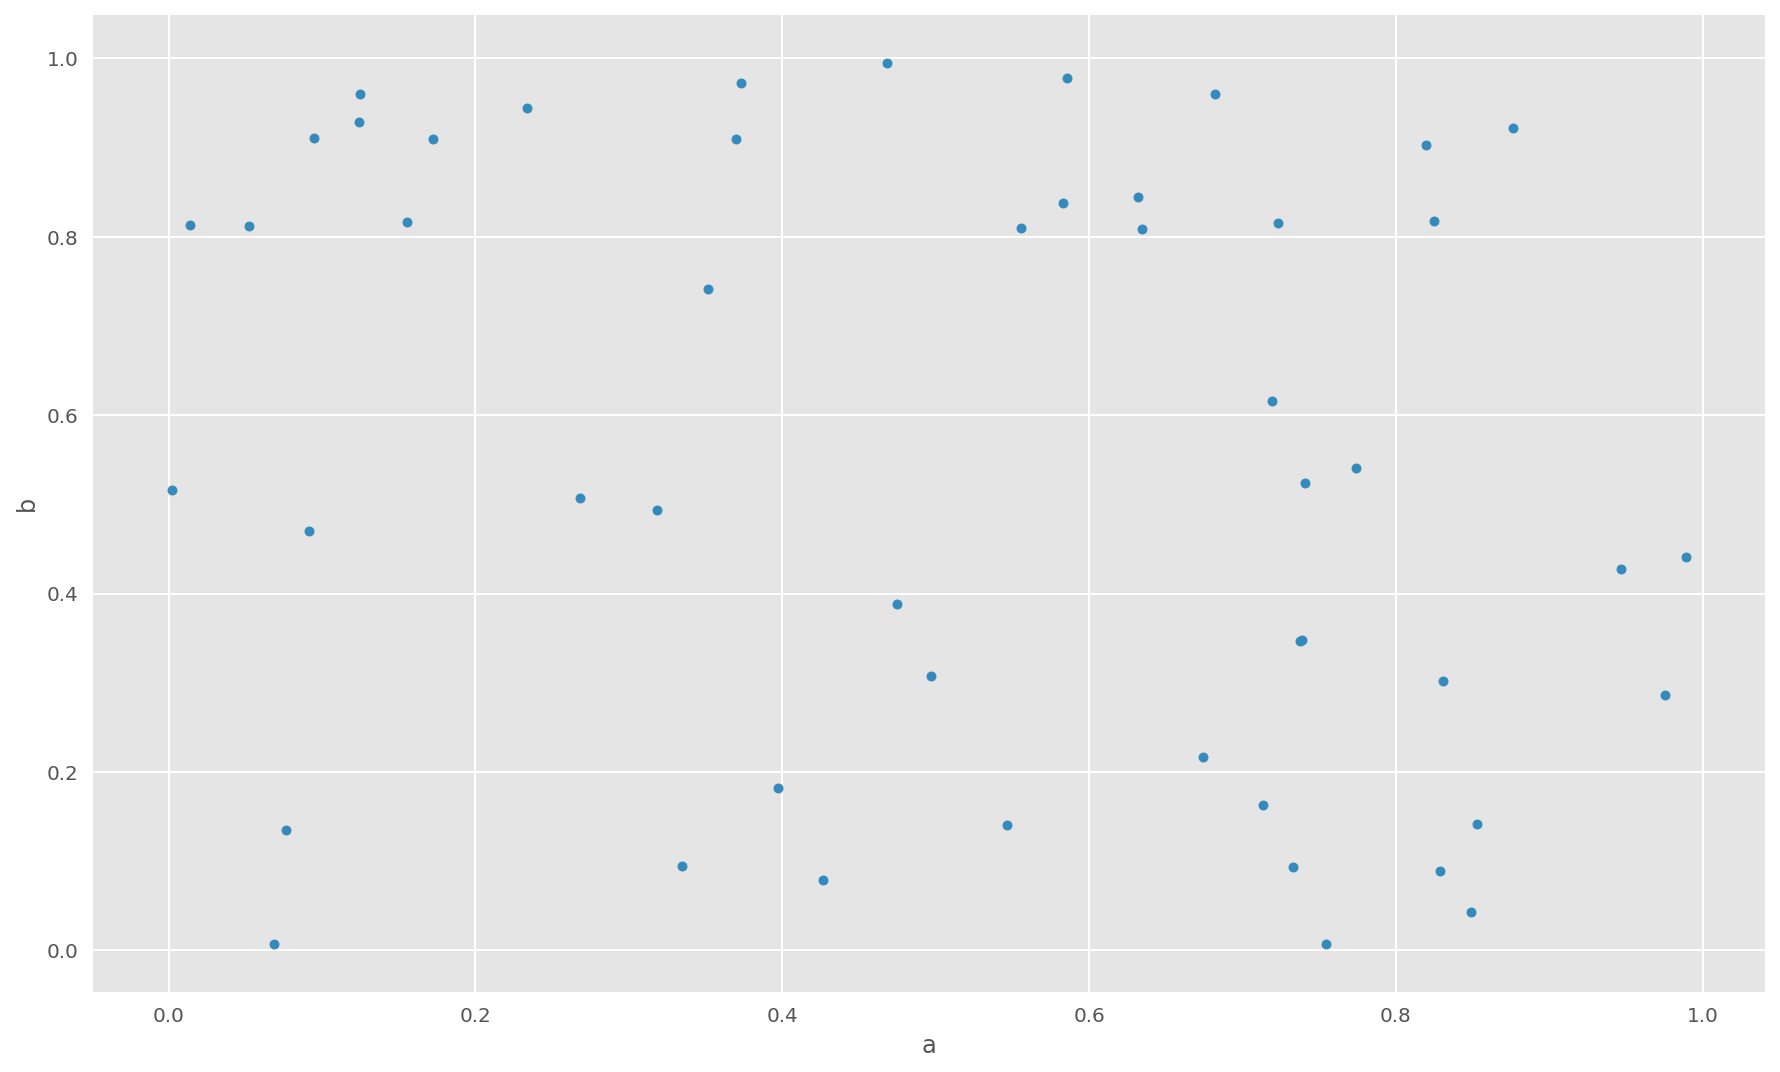

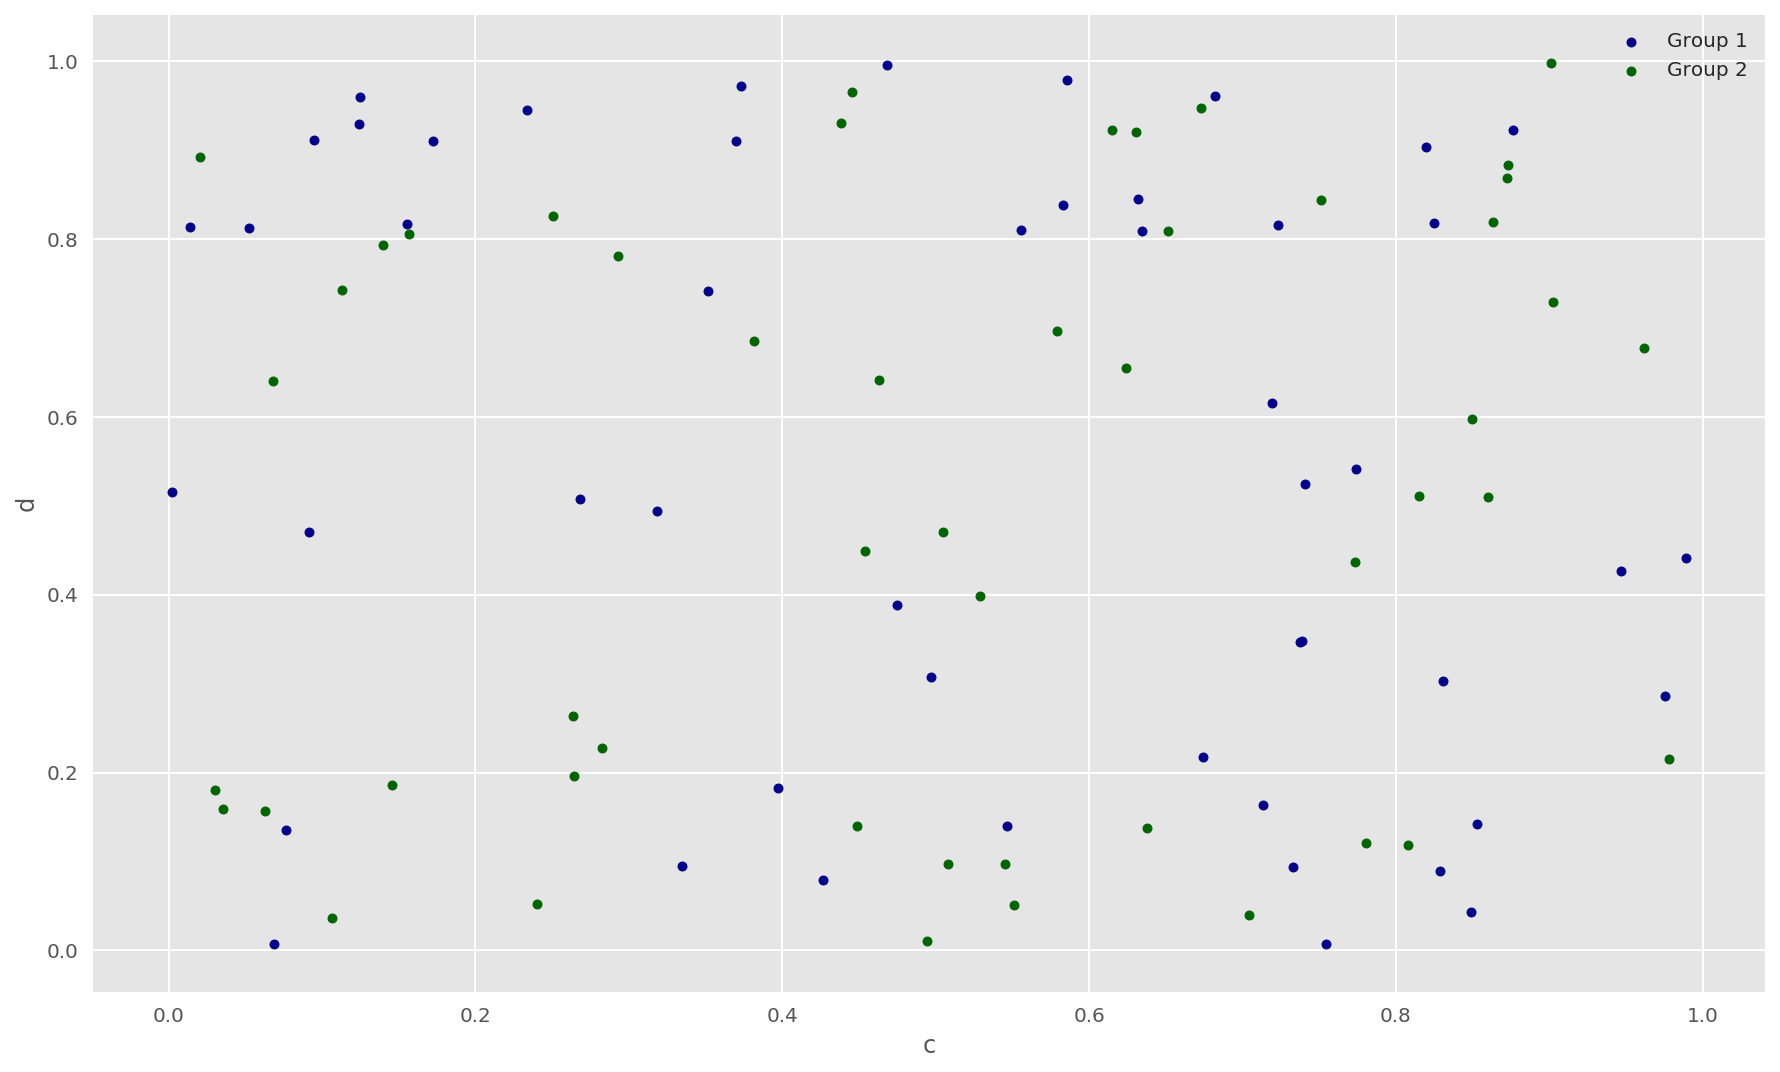

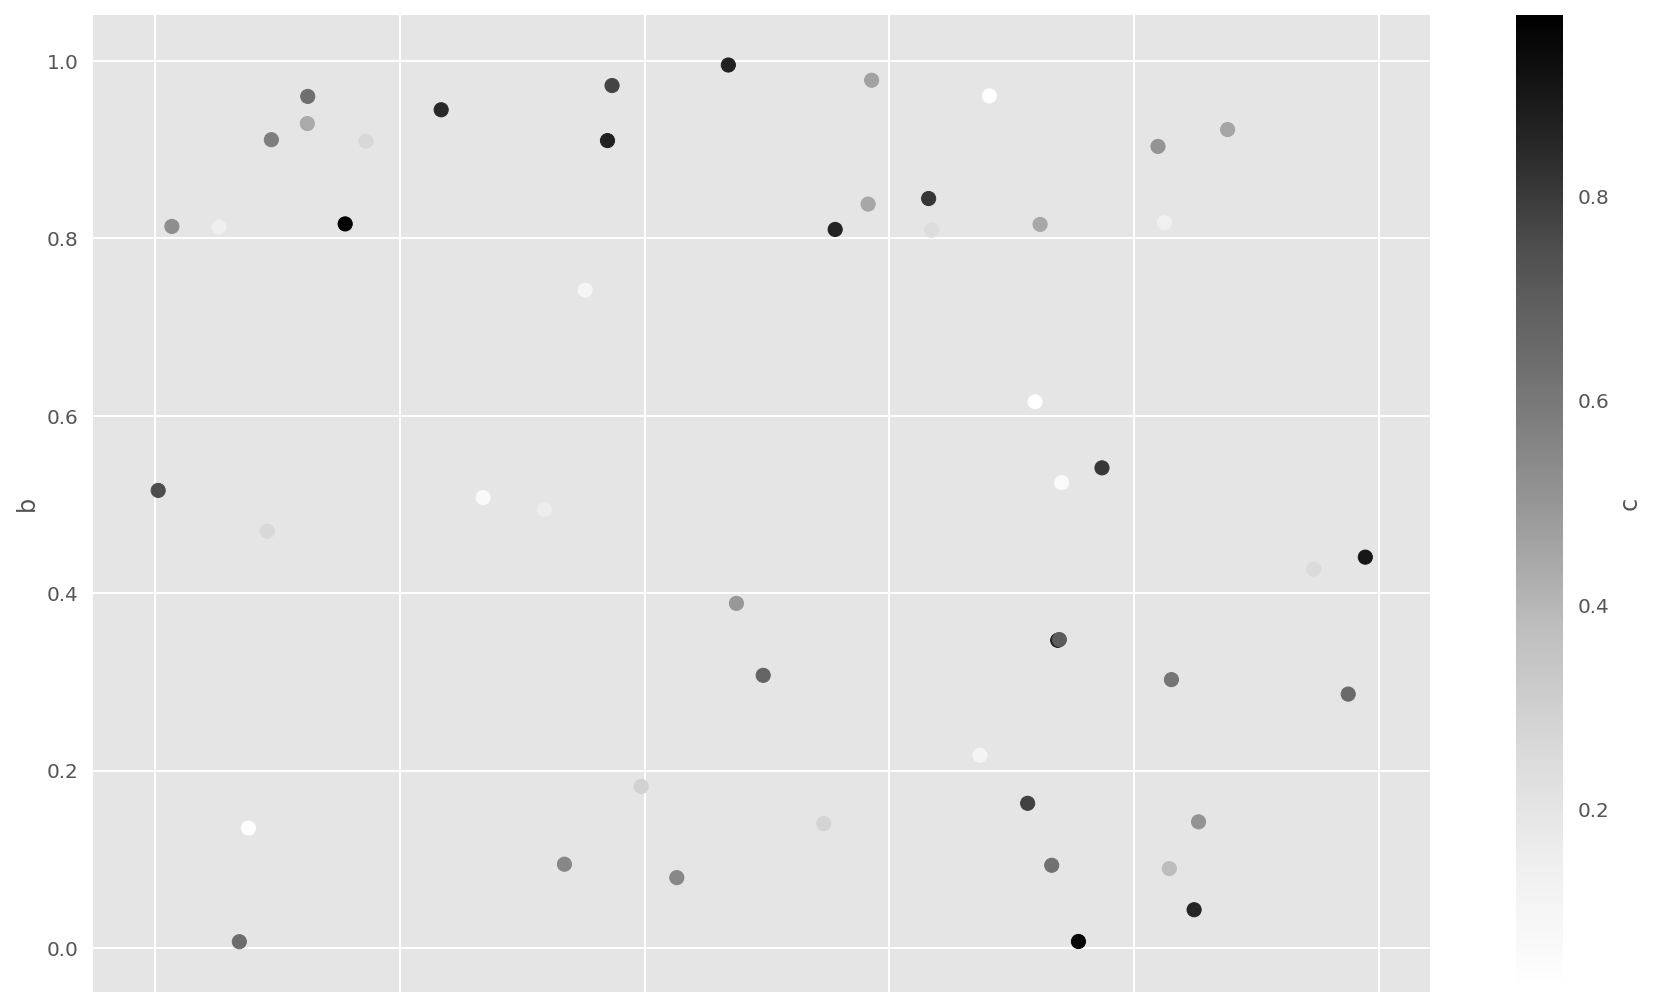

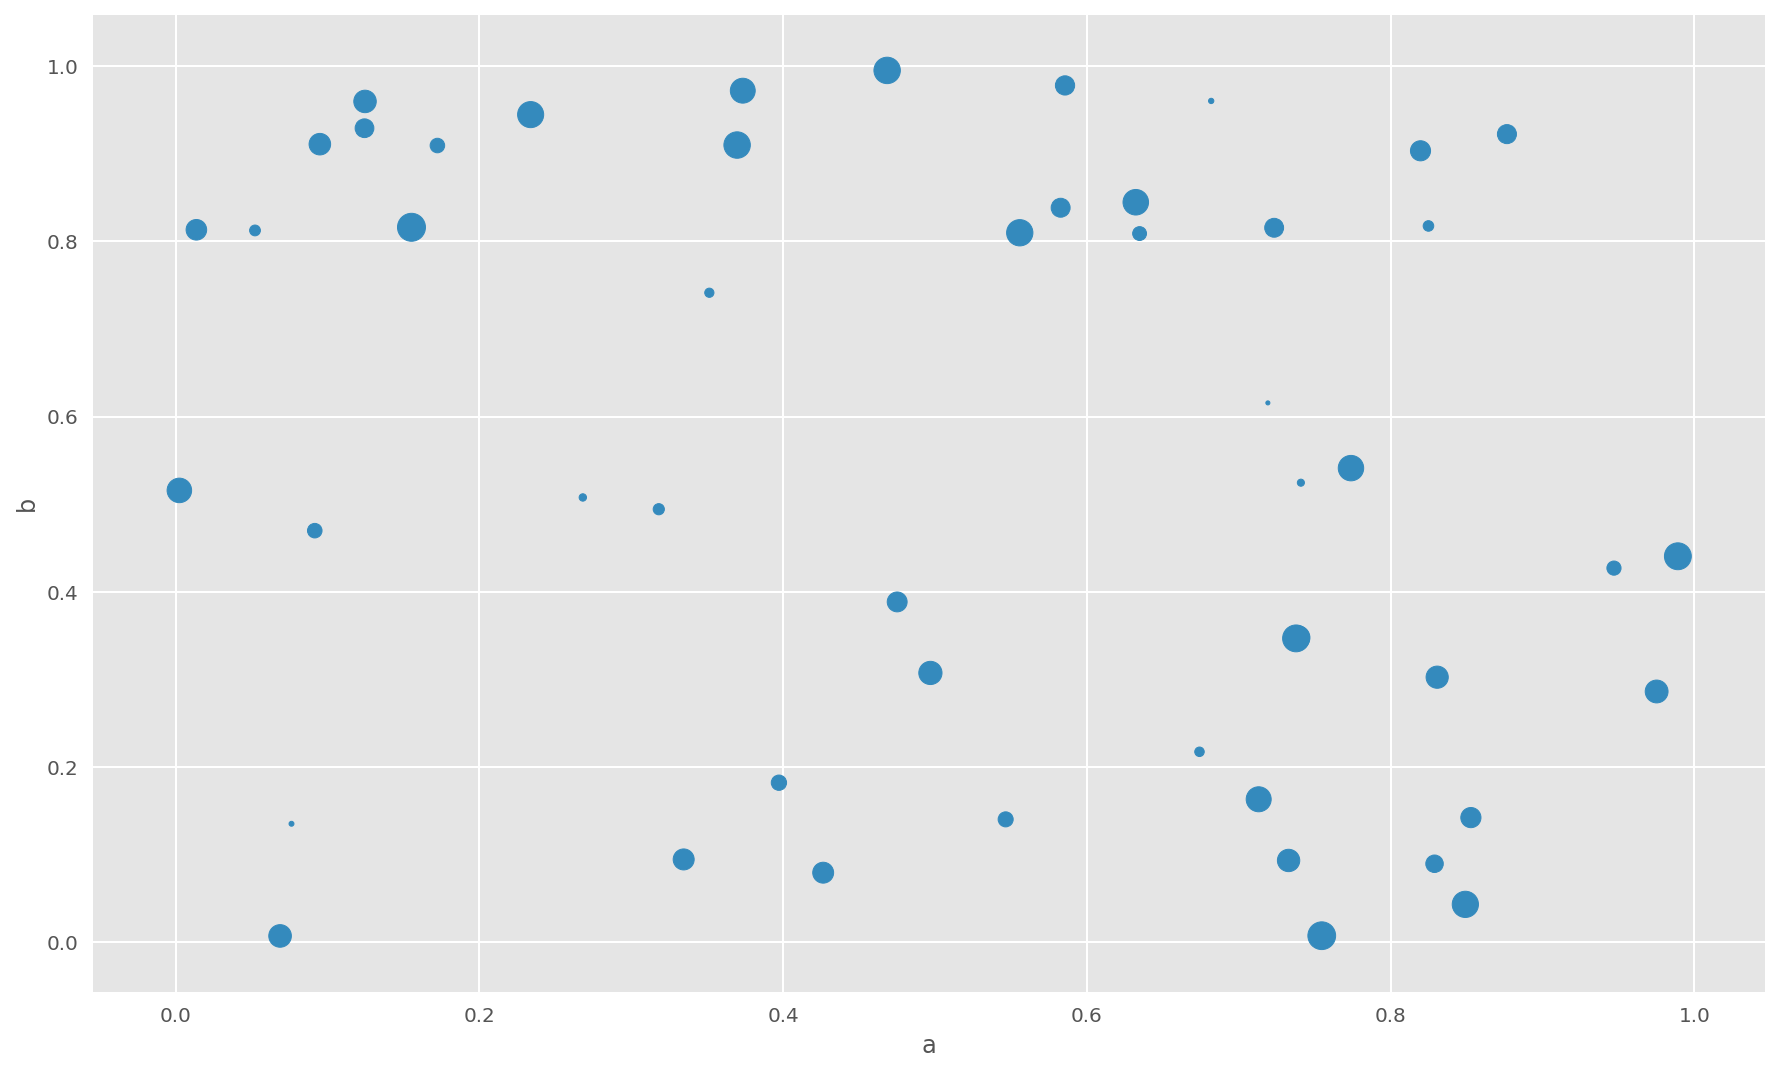

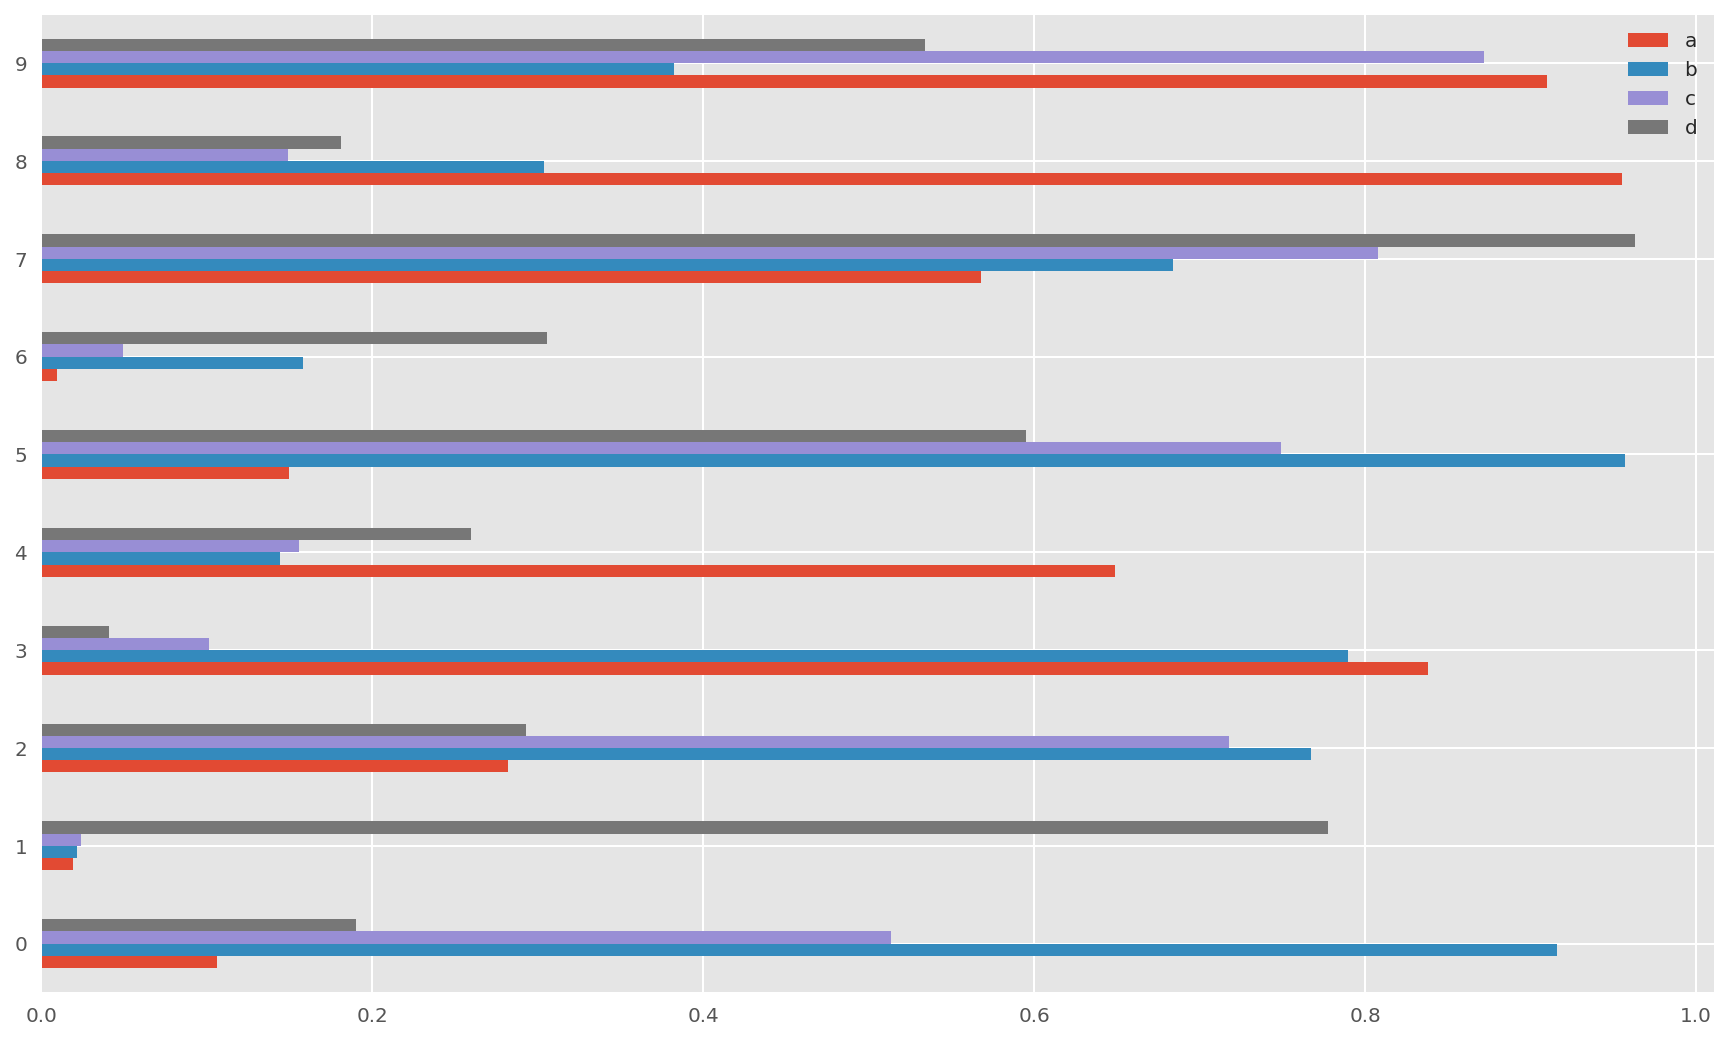

,a,b,c,d
0,0.106339,0.915873,0.513382,0.190492
1,0.019277,0.021653,0.024358,0.777600
2,0.282219,0.767605,0.717601,0.292744
3,0.837834,0.789804,0.101488,0.040929
4,0.648706,0.144420,0.156077,0.259651
5,0.149937,0.957215,0.749131,0.594896
6,0.009831,0.158447,0.049270,0.305686
7,0.568024,0.684196,0.807905,0.963401
8,0.955194,0.303673,0.148954,0.181159
9,0.909956,0.382538,0.871694,0.533821


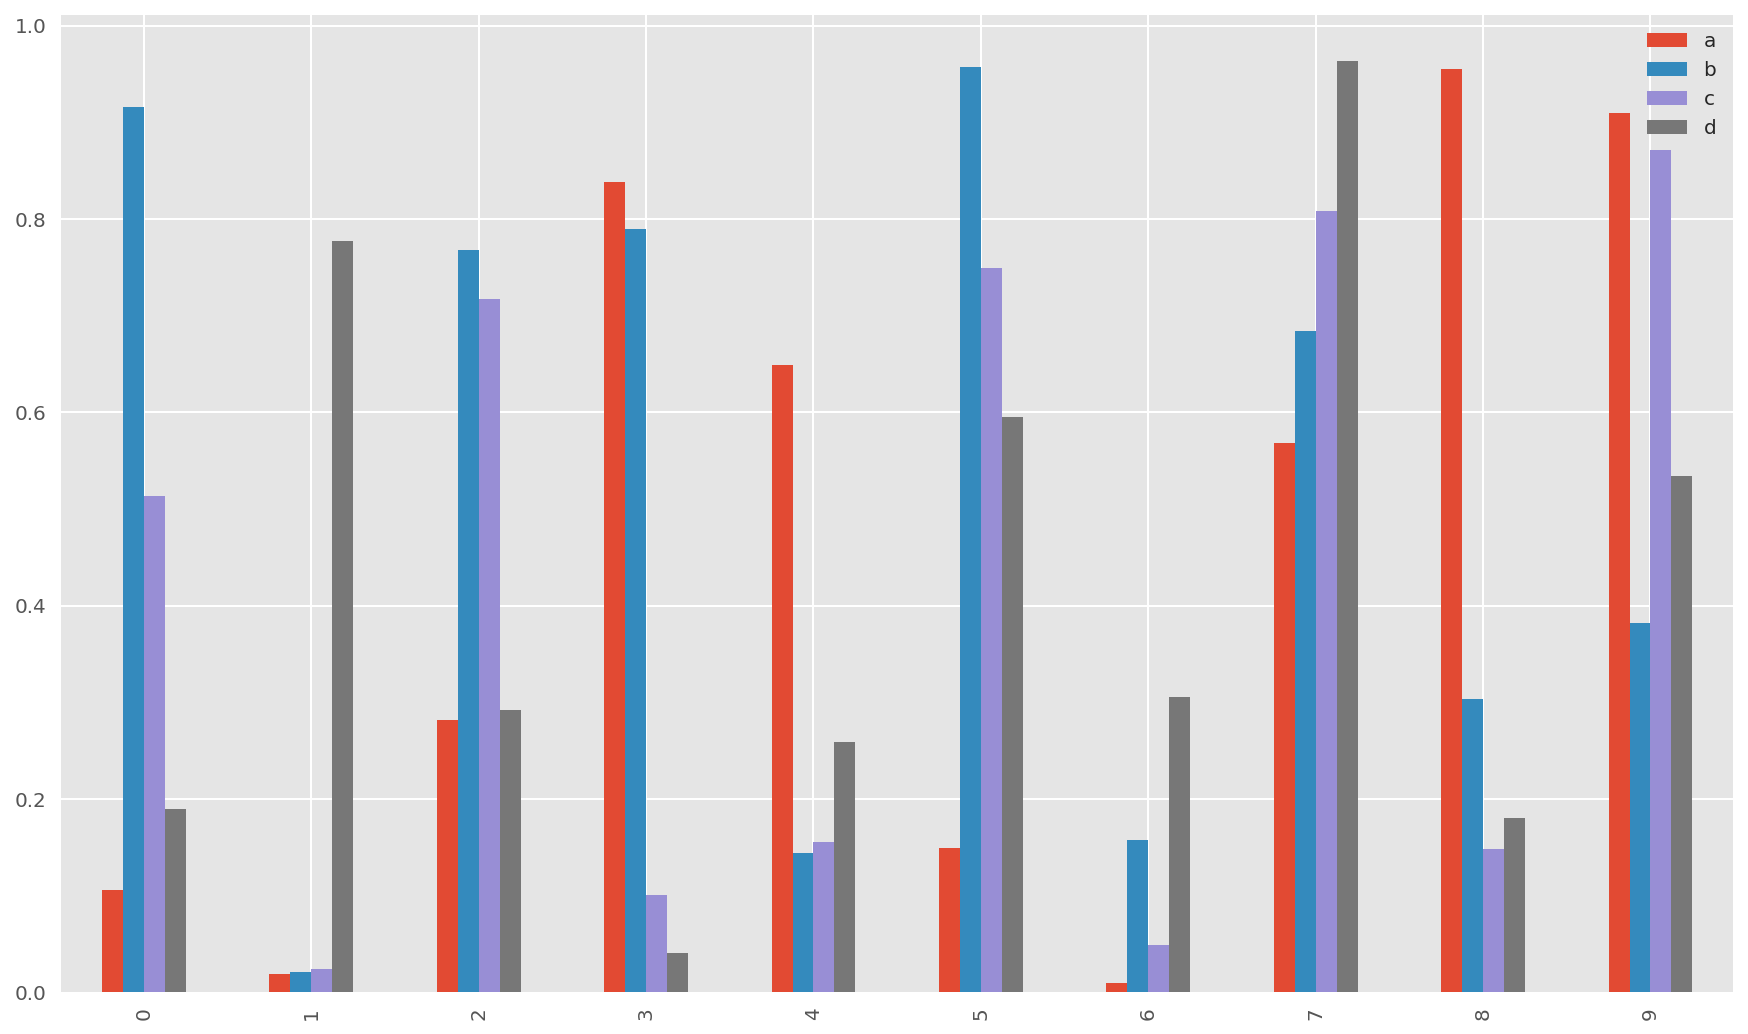

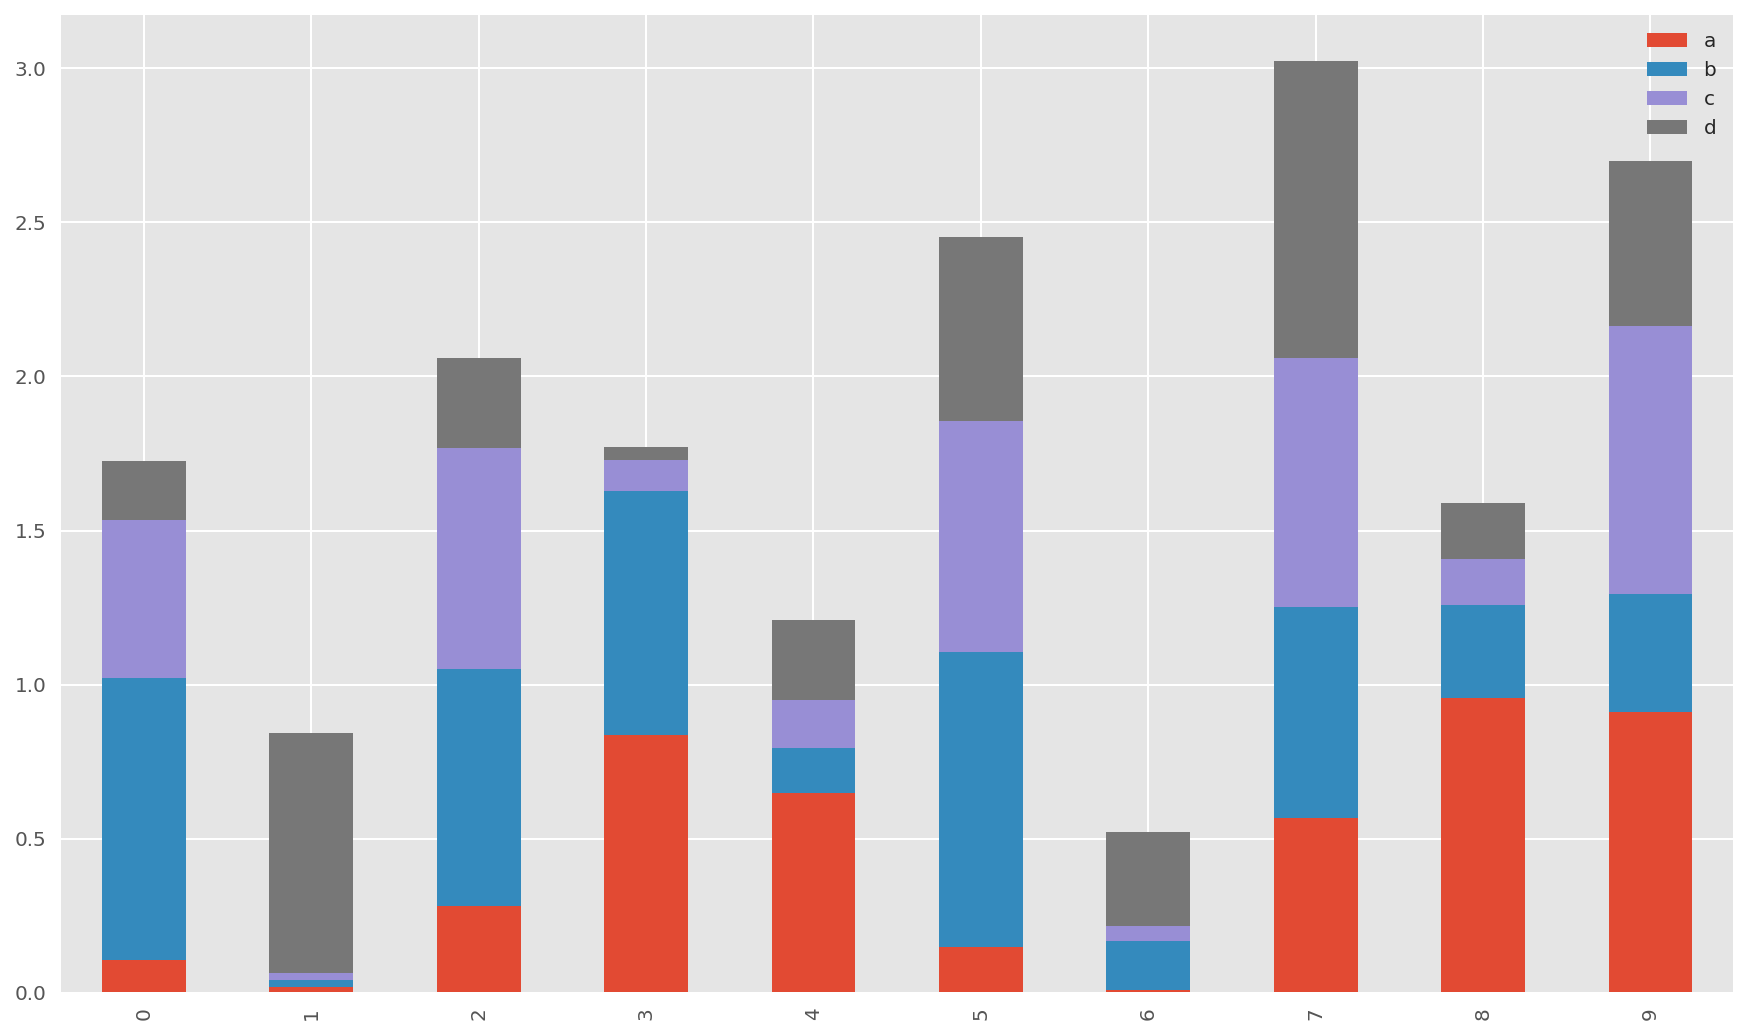

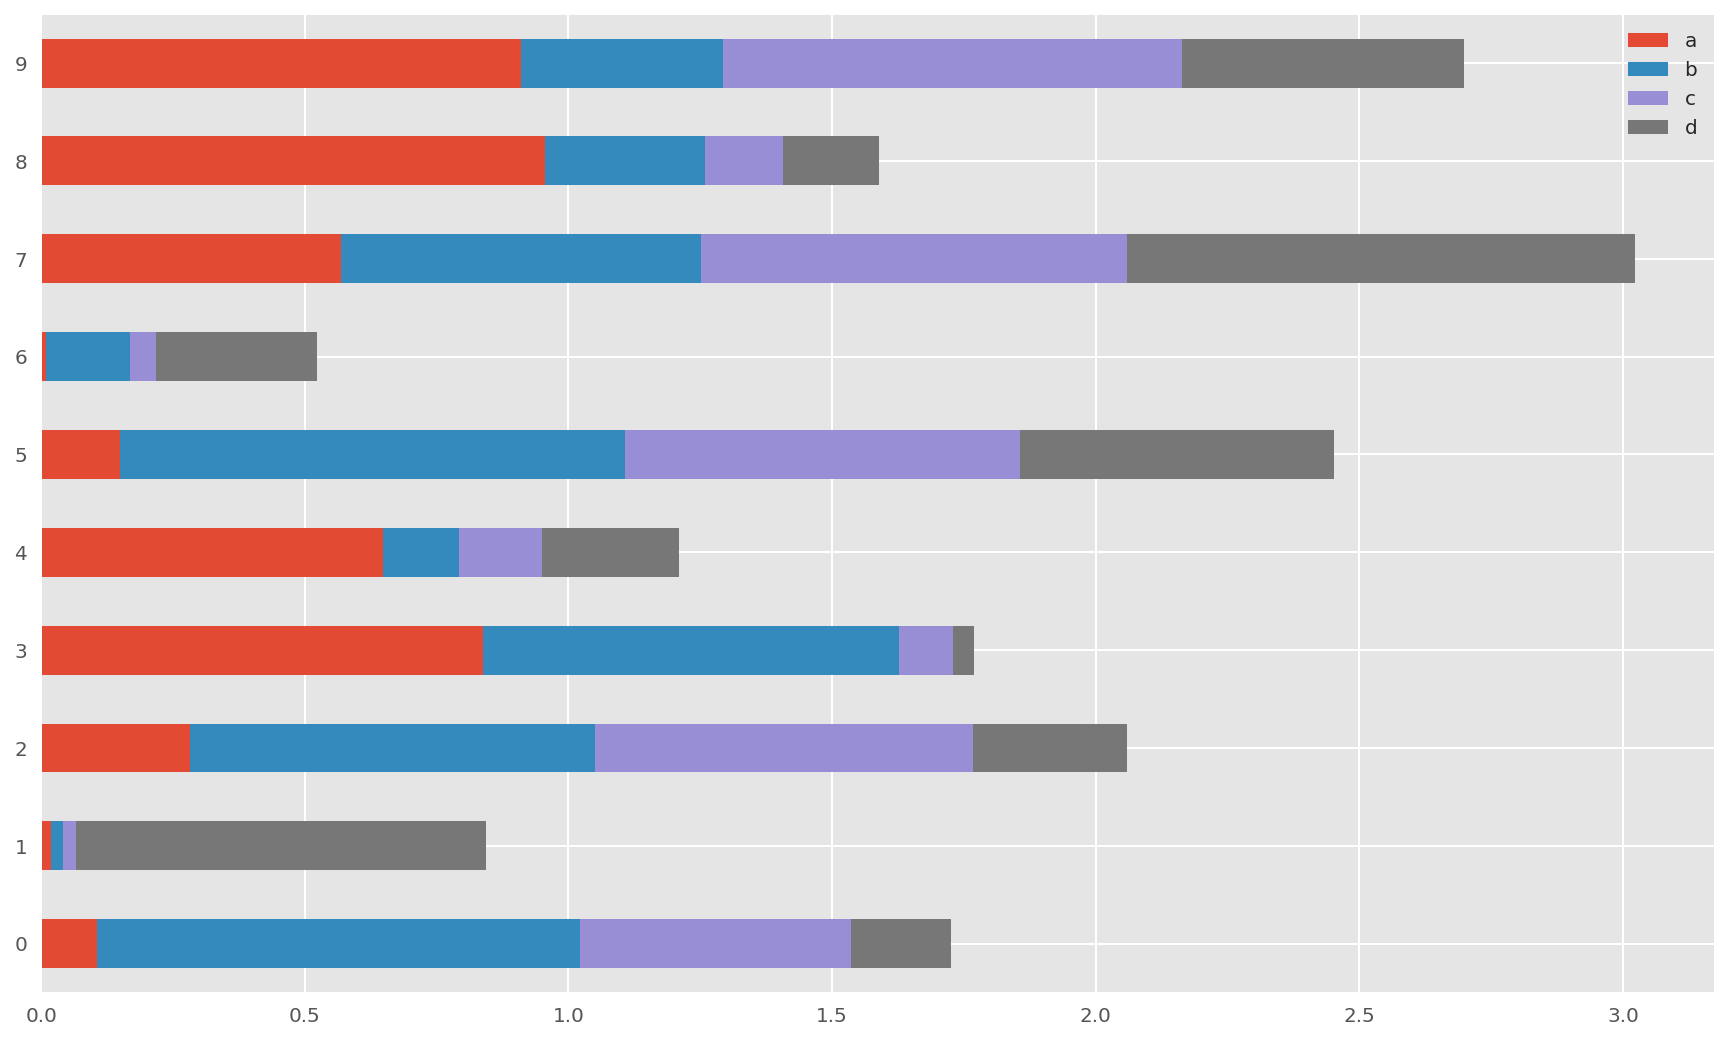

In [122]:
# bar plot, horizontal, vertical, stacked and unstacked bar plot
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df2.plot(kind='barh')
plt.show()


df2
df2.plot(kind='bar')
plt.show()

df2.plot(kind='bar', stacked=True);
plt.show()


df2.plot(kind='barh', stacked=True);
plt.show()

<function matplotlib.style.core.use>

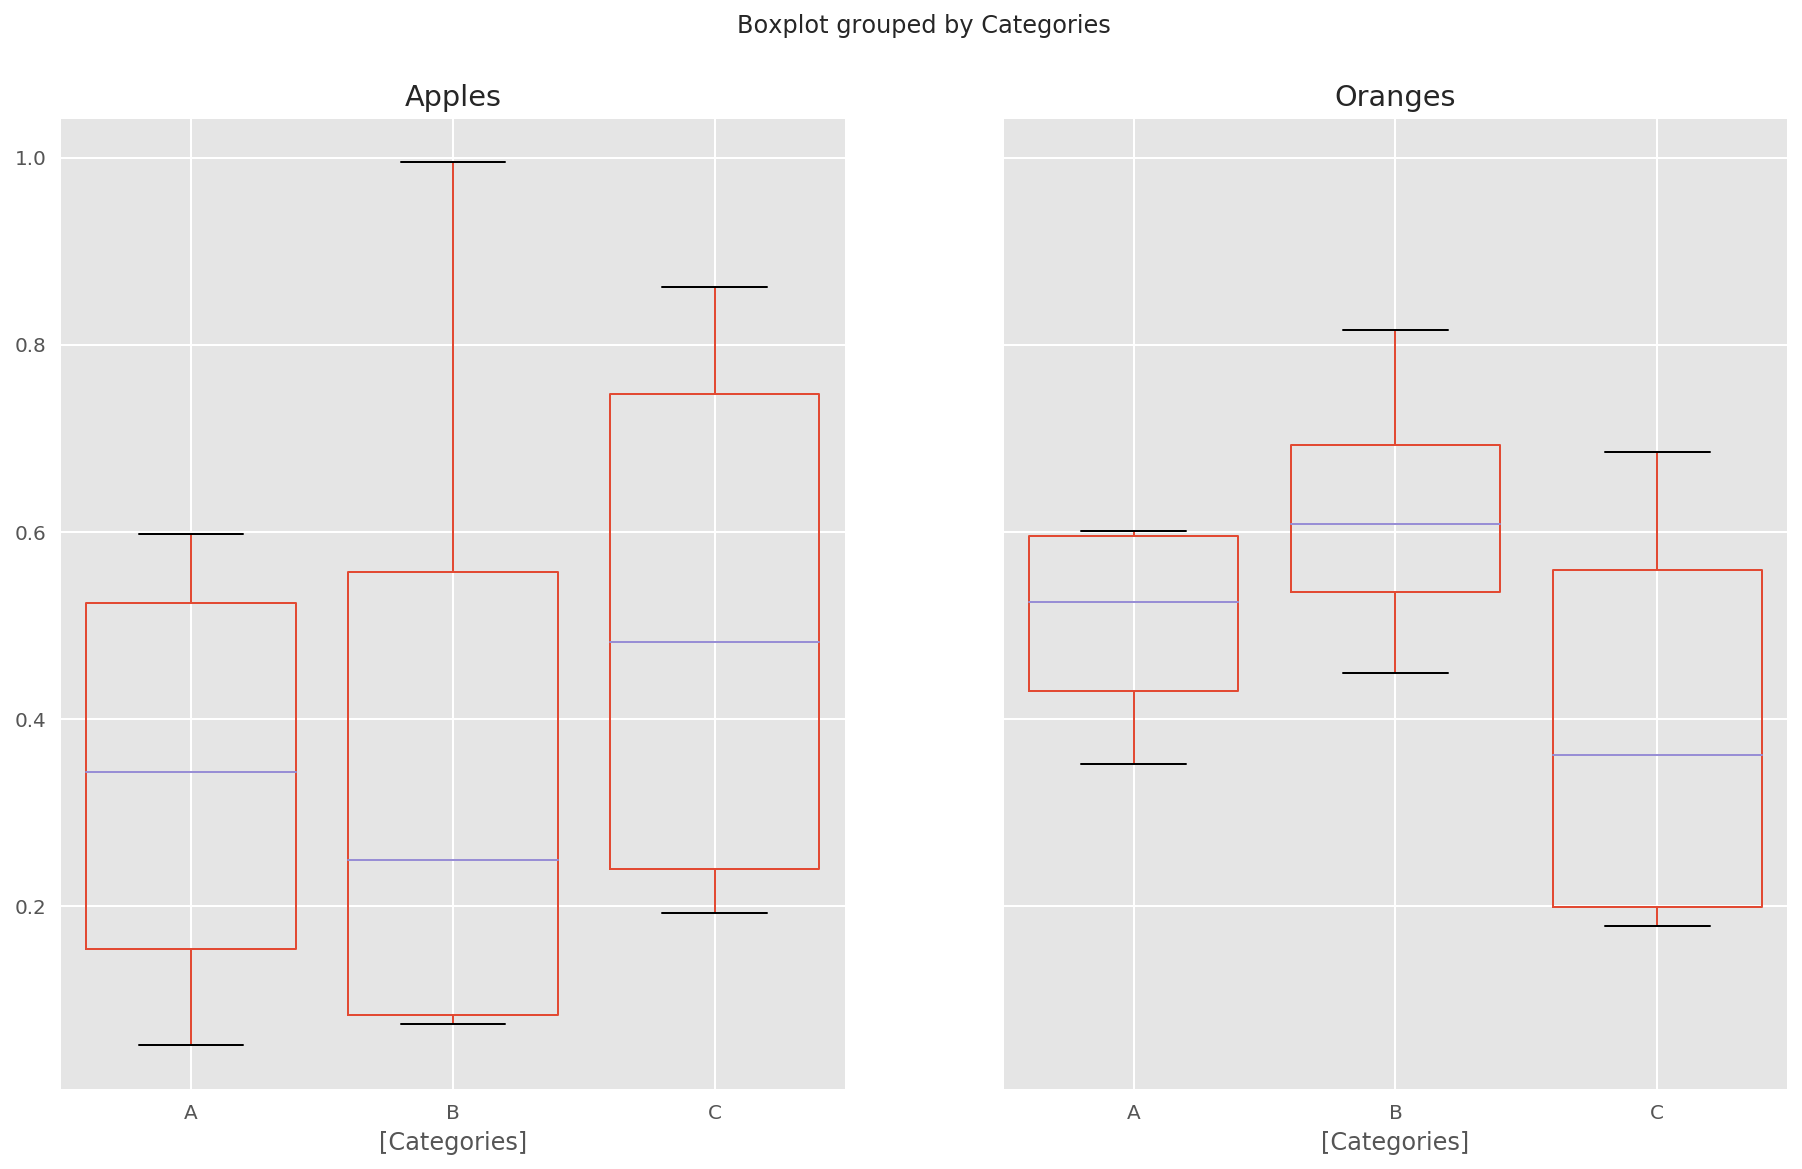

In [114]:
df = pd.DataFrame(np.random.rand(12,2), columns=['Apples', 'Oranges'] )
df['Categories'] = pd.Series(list('AAAABBBBCCCC'))
df
# pd.options.display.mpl_style = 'default'
matplotlib.pyplot.style.use 
_ = df.boxplot(by='Categories', showfliers=False, widths=(0.8,0.5,0.8))

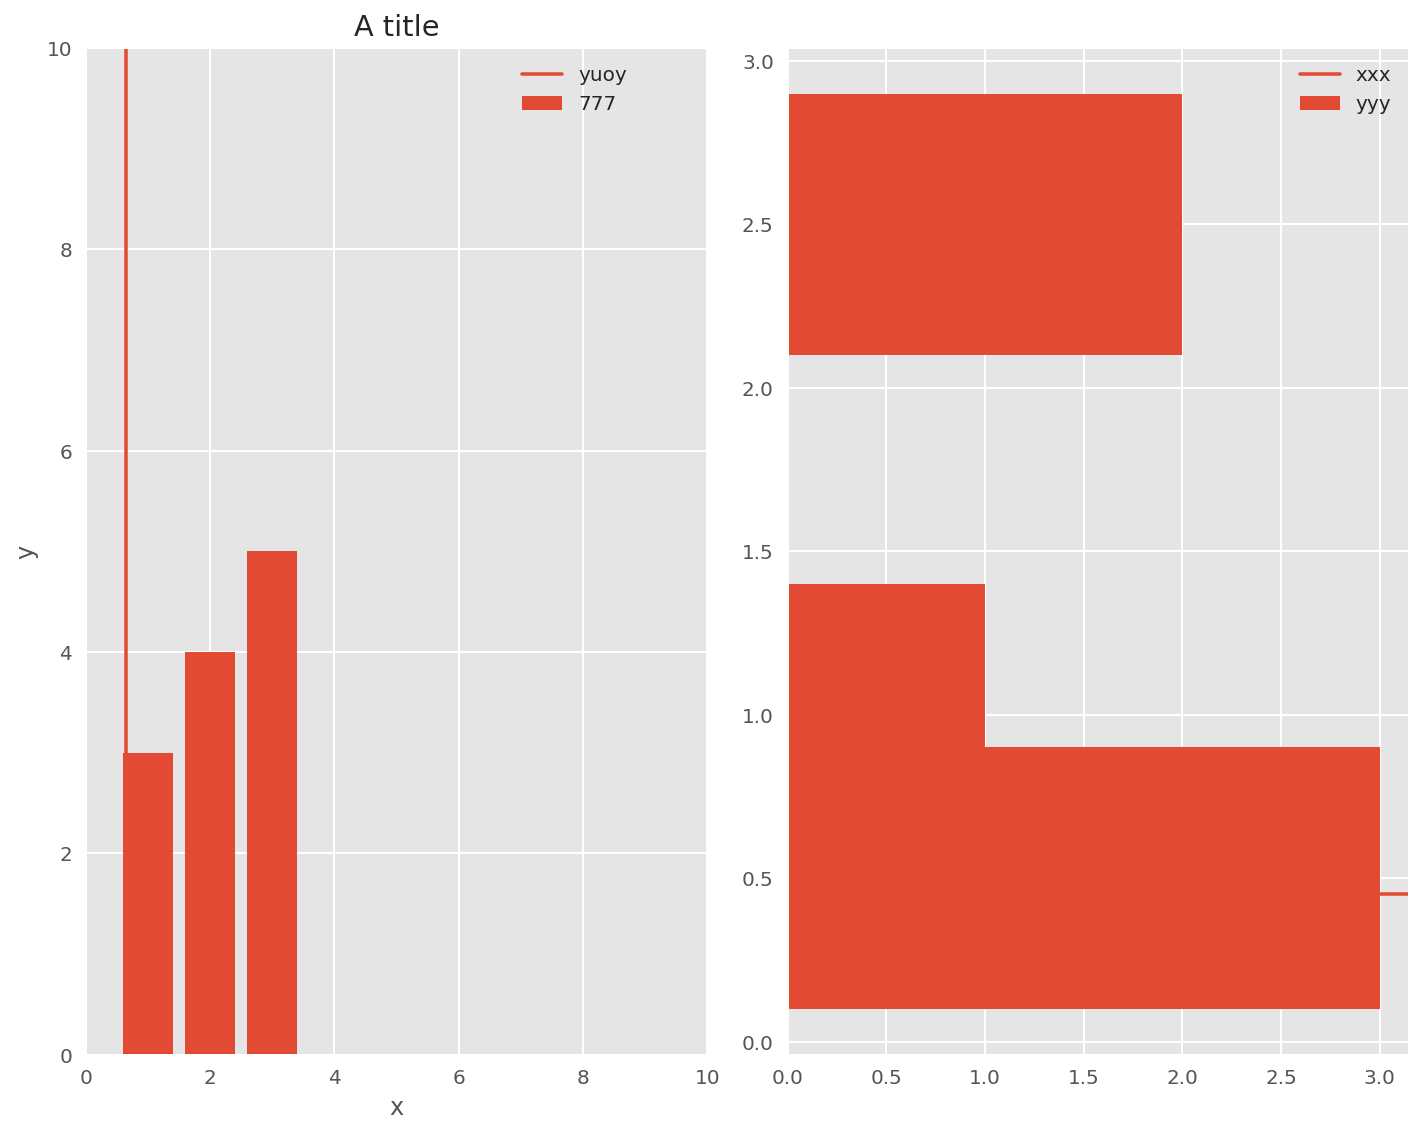

In [118]:
# matplotlib basics

# Import the necessary packages and modules
import matplotlib.pyplot as plt

# Create a Figure
fig = plt.figure(figsize=(10,8))

# Set up Axes
# rows, columns, number of the axes
_ = ax1 = fig.add_subplot(121)
_ = ax2 = fig.add_subplot(122)

# Plot the data
# ax.scatter(x,y)
_ = ax1.bar([1,2,3],[3,4,5])
_ = ax1.axvline(0.65)
_ = ax2.barh([0.5,1,2.5],[3,1,2])
_ = ax2.axhline(0.45)
_ = ax2.legend(labels=['xxx', 'yyy'])

_ = ax1.set(title="A title", xlabel="x", ylabel="y")
_ = ax1.set_xlim(0,10)
_ = ax1.set_ylim(0,10)
# ax1.set_title('abc')
_ = ax1.legend(labels=['yuoy', '777'], bbox_to_anchor=(0.9, 1.0))

plt.tight_layout()

#  Save Figure
plt.savefig("foo.png", dpi=200)

# Show the plot
plt.show()
plt.clf()

# ax.bar() 	Vertical rectangles
# ax.barh() 	Horizontal rectangles
# ax.axhline() 	Horizontal line across axes
# ax.vline() 	Vertical line across axes
# ax.fill() 	Filled polygons
# ax.fill_between() 	Fill between y-values and 0
# ax.stackplot() 	Stack plot
# ax.arrow() 	Arrow
# ax.quiver() 	2D field of arrows
# ax.streamplot() 	2D vector fields
# ax.hist() 	Histogram
# ax.boxplot() 	Boxplot
# ax.violinplot() 	Violinplot
# ax.pcolor() 	Pseudocolor plot
# ax.pcolormesh() 	Pseudocolor plot
# ax.contour() 	Contour plot
# ax.contourf() 	Filled contour plot
# ax.clabel() 	Labeled contour plot

In [121]:
# baseball.hr

,id,player,year,stint,team,lg,g,ab,r,h,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


(100,)

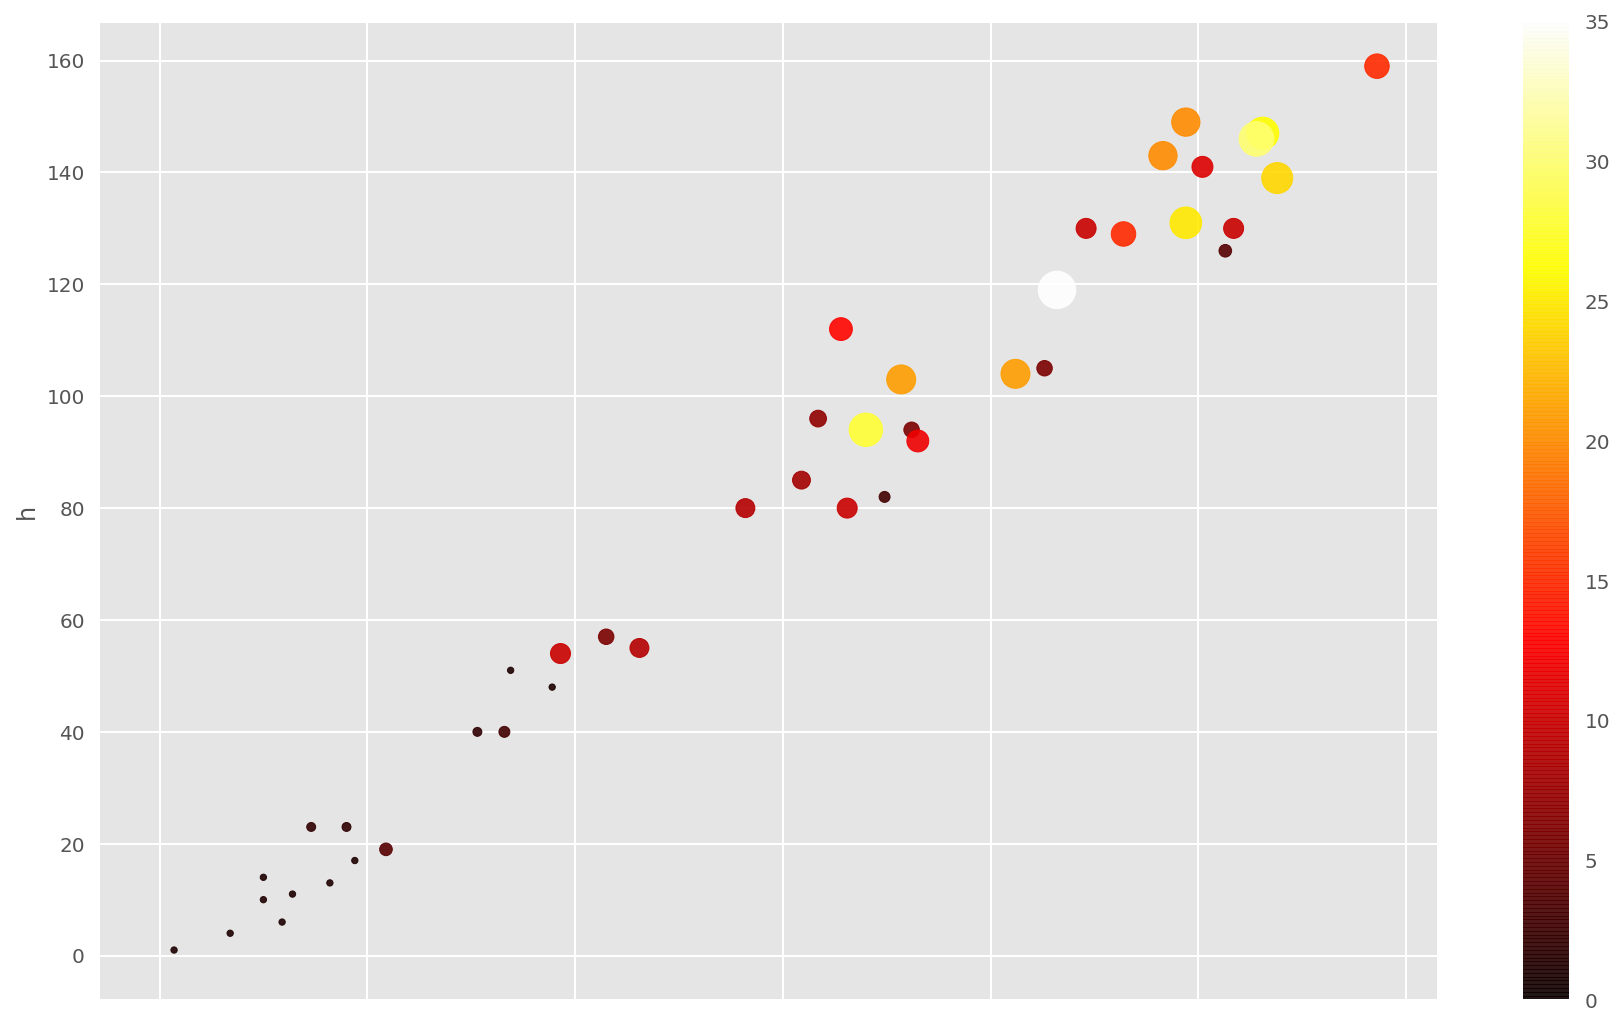

(0, 700)

(0, 200)

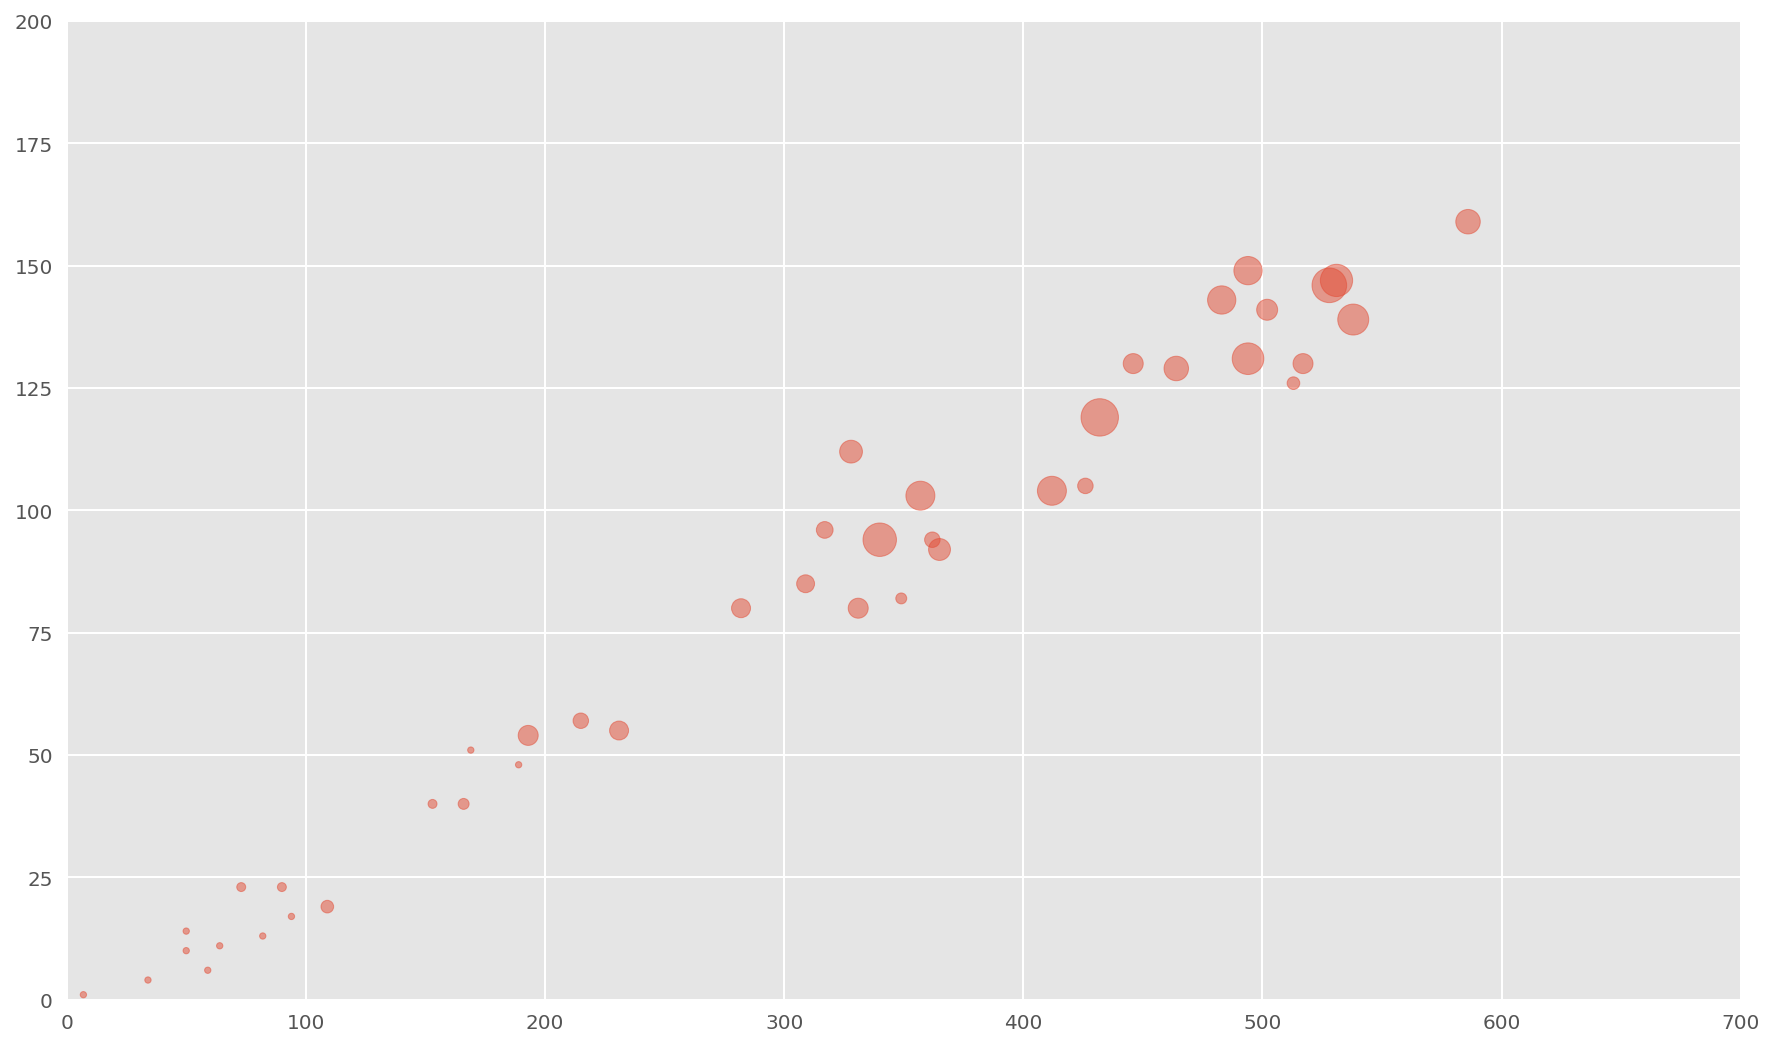

(0, 700)

(0, 200)

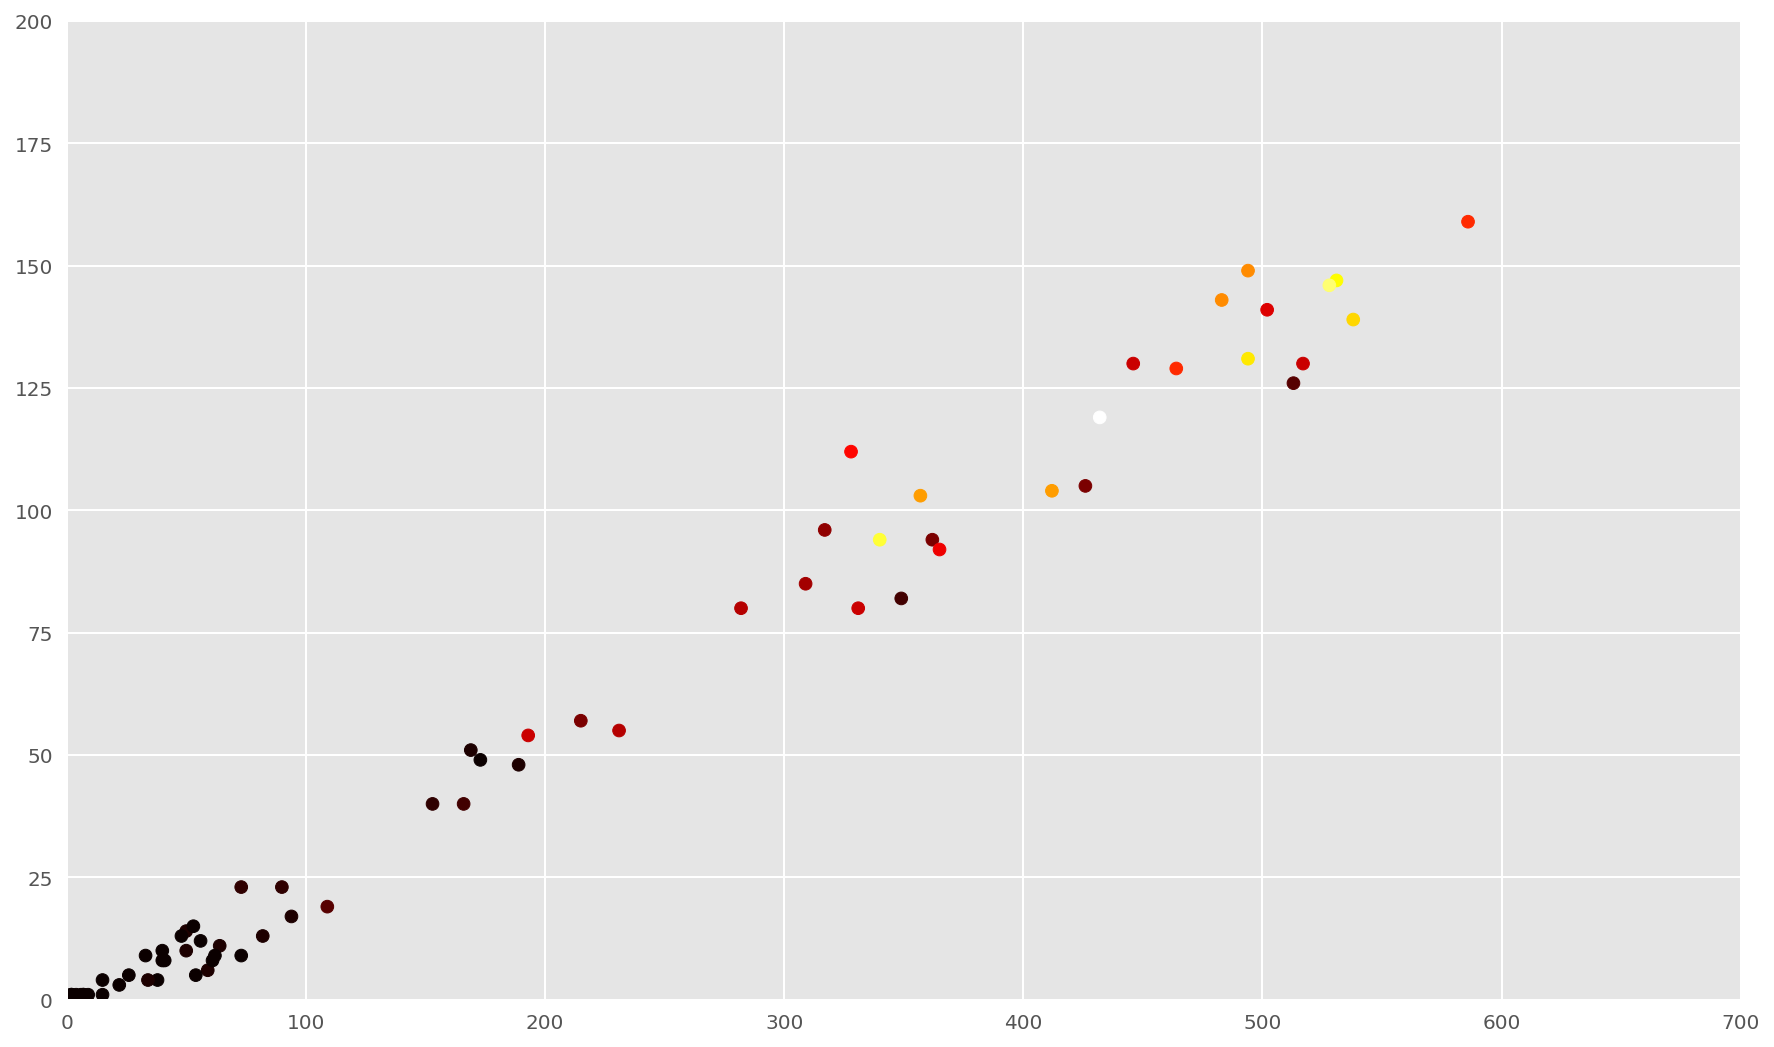

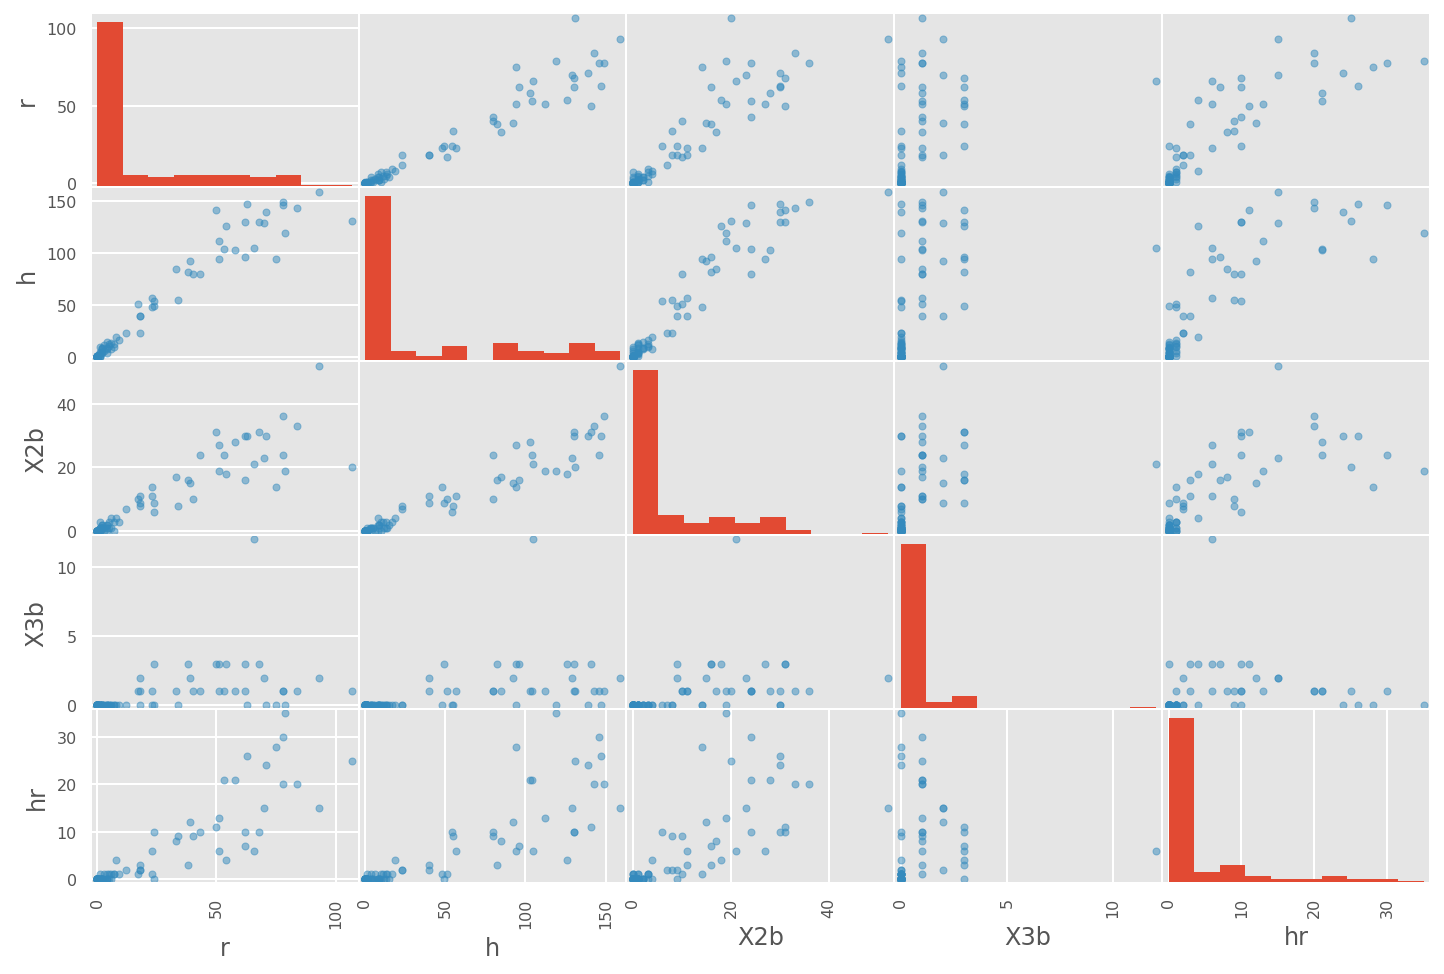

In [113]:
# sort a dictionary based on values
d = {"aa": 3, "bb": 4, "cc": 2, "dd": 1}
s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
s

sorted(d, key=d.get, reverse=True)

[('bb', 4), ('aa', 3), ('cc', 2), ('dd', 1)]

['bb', 'aa', 'cc', 'dd']

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


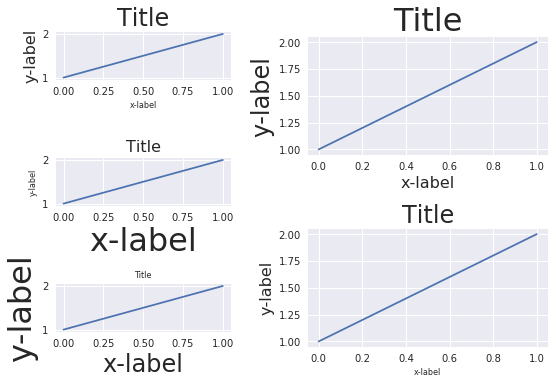

In [8]:
import matplotlib.pyplot as plt
import itertools
import warnings


fontsizes = itertools.cycle([8, 16, 24, 32])


def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=next(fontsizes))
    ax.set_ylabel('y-label', fontsize=next(fontsizes))
    ax.set_title('Title', fontsize=next(fontsizes))



# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# example_plot(ax1)
# example_plot(ax2)
# example_plot(ax3)
# example_plot(ax4)
# plt.tight_layout()



# fig, axes = plt.subplots(nrows=3, ncols=3)
# for row in axes:
#     for ax in row:
#         example_plot(ax)
# plt.tight_layout()


# fig = plt.figure()
# ax1 = plt.subplot(221)
# ax2 = plt.subplot(223)
# ax3 = plt.subplot(122)

# example_plot(ax1)
# example_plot(ax2)
# example_plot(ax3)

# plt.tight_layout()


# fig = plt.figure()

# ax1 = plt.subplot2grid((3, 3), (0, 0))
# ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
# ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
# ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

# example_plot(ax1)
# example_plot(ax2)
# example_plot(ax3)
# example_plot(ax4)

# plt.tight_layout()

# plt.show()


fig = plt.figure()

import matplotlib.gridspec as gridspec

gs1 = gridspec.GridSpec(3, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)

with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
    # This raises warnings since tight layout cannot
    # handle gridspec automatically. We are going to
    # do that manually so we can filter the warning.
    gs1.tight_layout(fig, rect=[None, None, 0.45, None])

gs2 = gridspec.GridSpec(2, 1)
ax4 = fig.add_subplot(gs2[0])
ax5 = fig.add_subplot(gs2[1])

example_plot(ax4)
example_plot(ax5)

with warnings.catch_warnings():
    # This raises warnings since tight layout cannot
    # handle gridspec automatically. We are going to
    # do that manually so we can filter the warning.
    warnings.simplefilter("ignore", UserWarning)
    gs2.tight_layout(fig, rect=[0.45, None, None, None])

# # now match the top and bottom of two gridspecs.
# top = min(gs1.top, gs2.top)
# bottom = max(gs1.bottom, gs2.bottom)

# gs1.update(top=top, bottom=bottom)
# gs2.update(top=top, bottom=bottom)

plt.show()

In [88]:
gs2.tight_layout?

In [4]:
np.arange(2,20,3)

array([ 2,  5,  8, 11, 14, 17])